In [1]:
!pip install streamlit


In [1]:
!pip install xgboost


In [1]:
import numpy as np
import pandas as pd


In [2]:
full_data = pd.read_csv("C:/Users/livea/Downloads/diabetes.csv")

In [3]:
full_data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
# بررسی اماری و پلات ها 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیمات ظاهری برای بهتر بودن خروجی
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [6]:
print(full_data.info())
print(full_data.describe())
print(full_data['Outcome'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

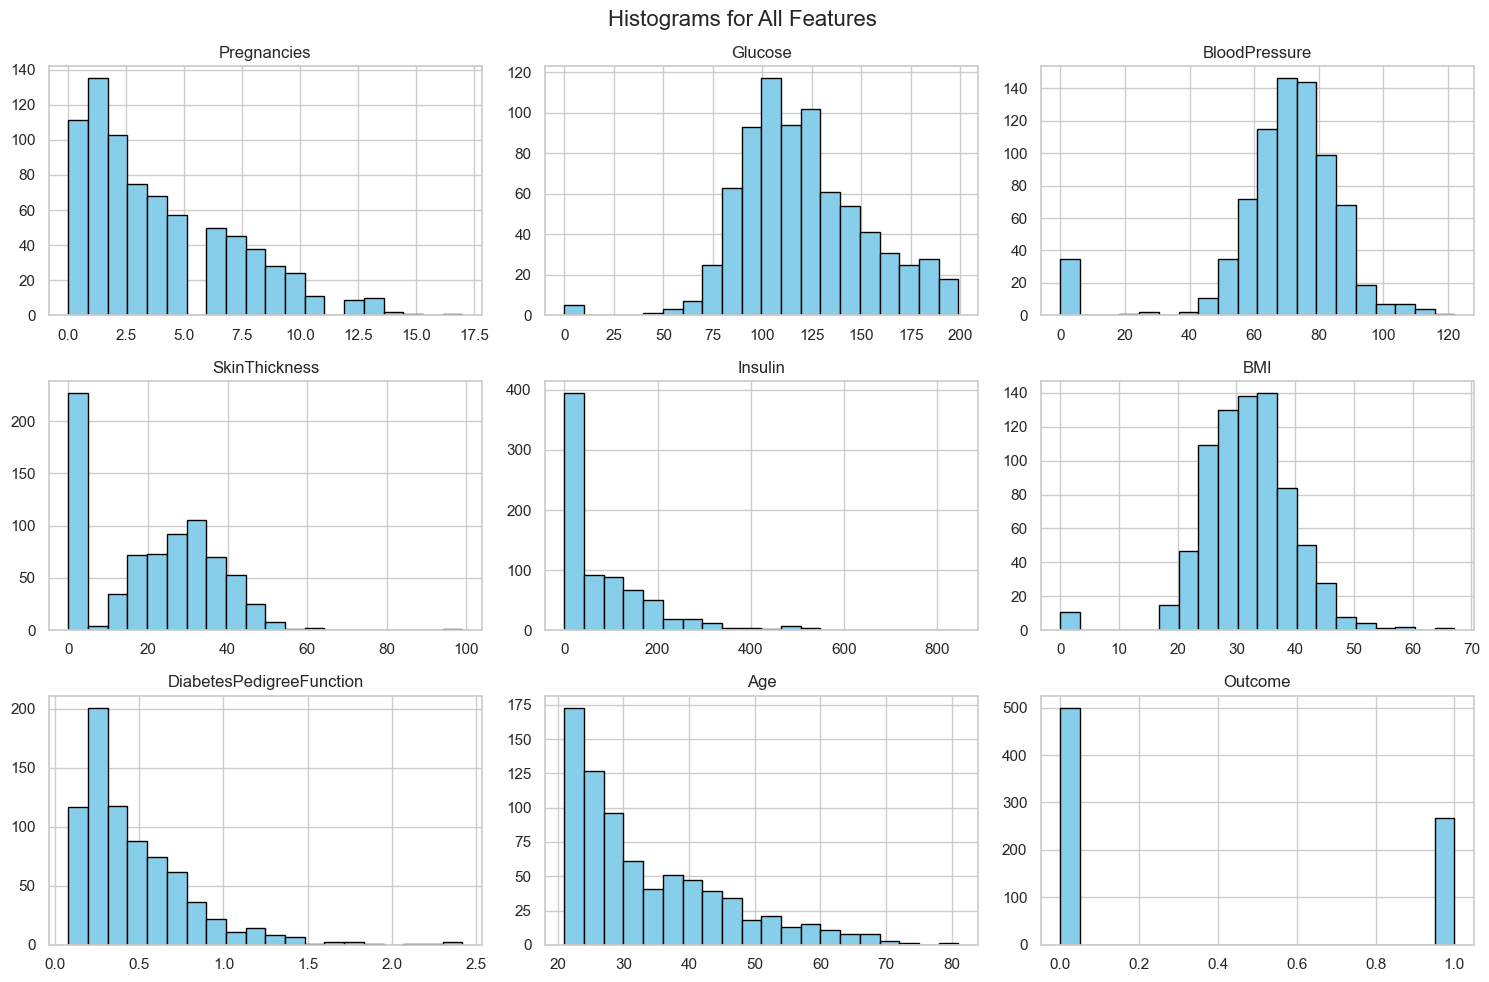

In [7]:
#هیستوگرام (Histogram) برای هر ستون
full_data.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms for All Features", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\livea\AppData\Local\Temp\ipykernel_4312\2621219658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_data, y=column, x='Outcome', palette='pastel')
C:\Users\livea\AppData\Local\Temp\ipykernel_4312\2621219658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_data, y=column, x='Outcome', palette='pastel')
C:\Users\livea\AppData\Local\Temp\ipykernel_4312\2621219658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_data, y=column, x='Outcome', palette='pastel')
C:\Users\livea\AppData\Local\Temp\ipyker

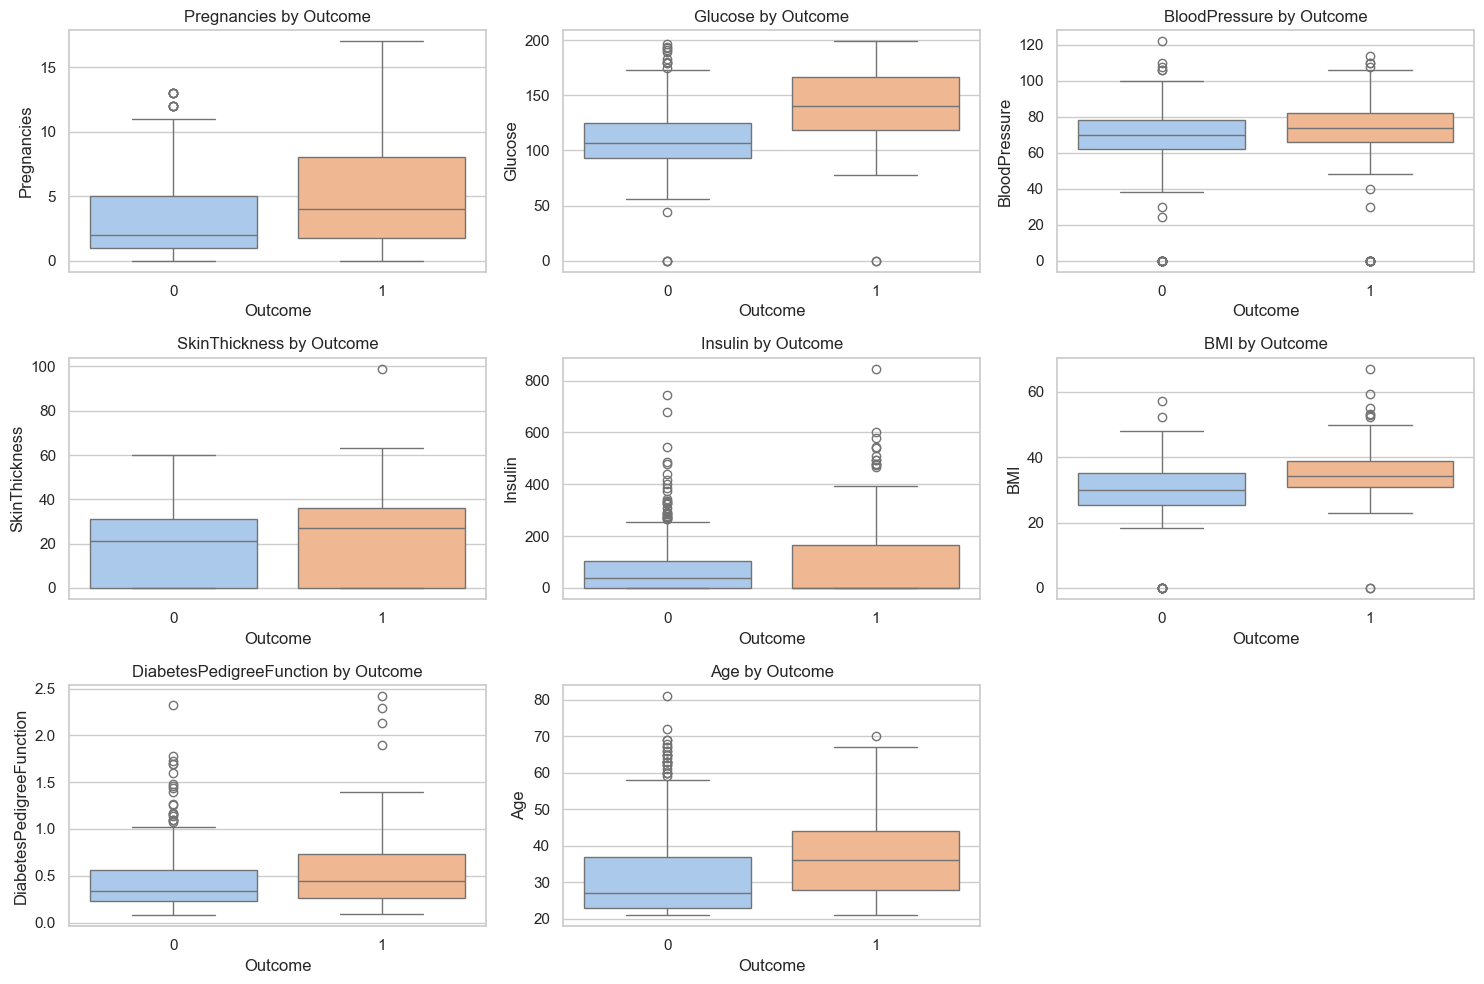

In [8]:
#نمودار جعبه‌ای (Boxplot) برای بررسی نرمال بودن و وجود آوتلایر
plt.figure(figsize=(15, 10))
for i, column in enumerate(full_data.columns[:-1], 1):  # به جز Outcome
    plt.subplot(3, 3, i)
    sns.boxplot(data=full_data, y=column, x='Outcome', palette='pastel')
    plt.title(f'{column} by Outcome')

plt.tight_layout()
plt.show()


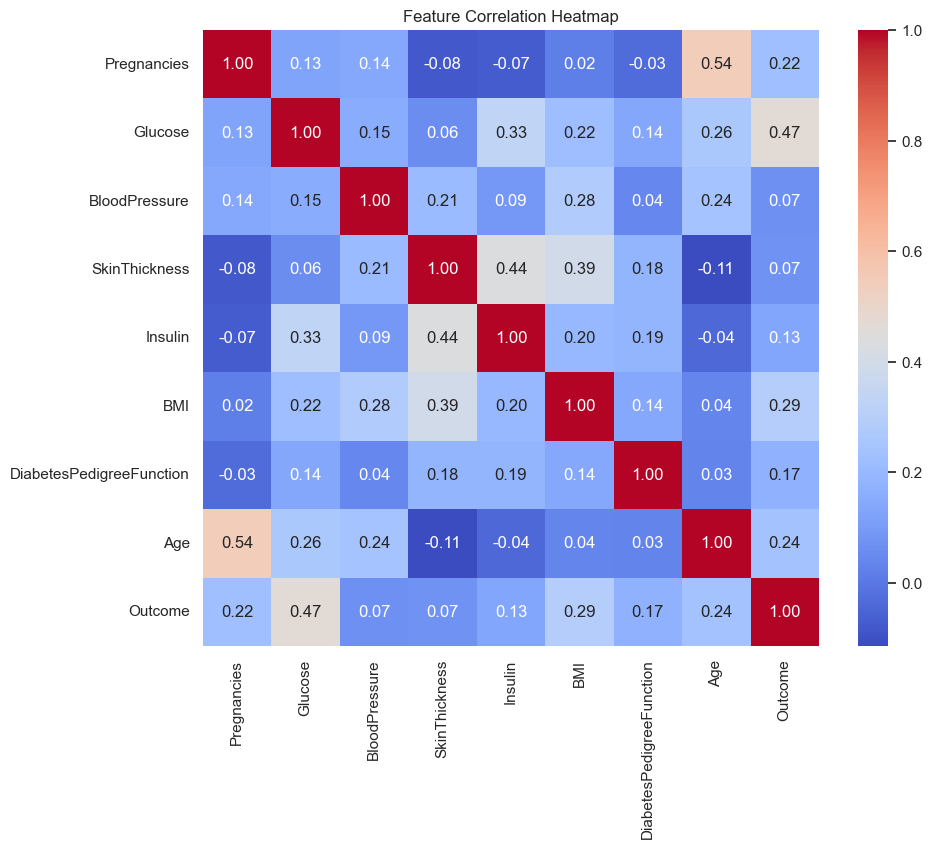

In [9]:
#نقشه حرارتی همبستگی (Correlation Heatmap)
plt.figure(figsize=(10, 8))
corr = full_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()


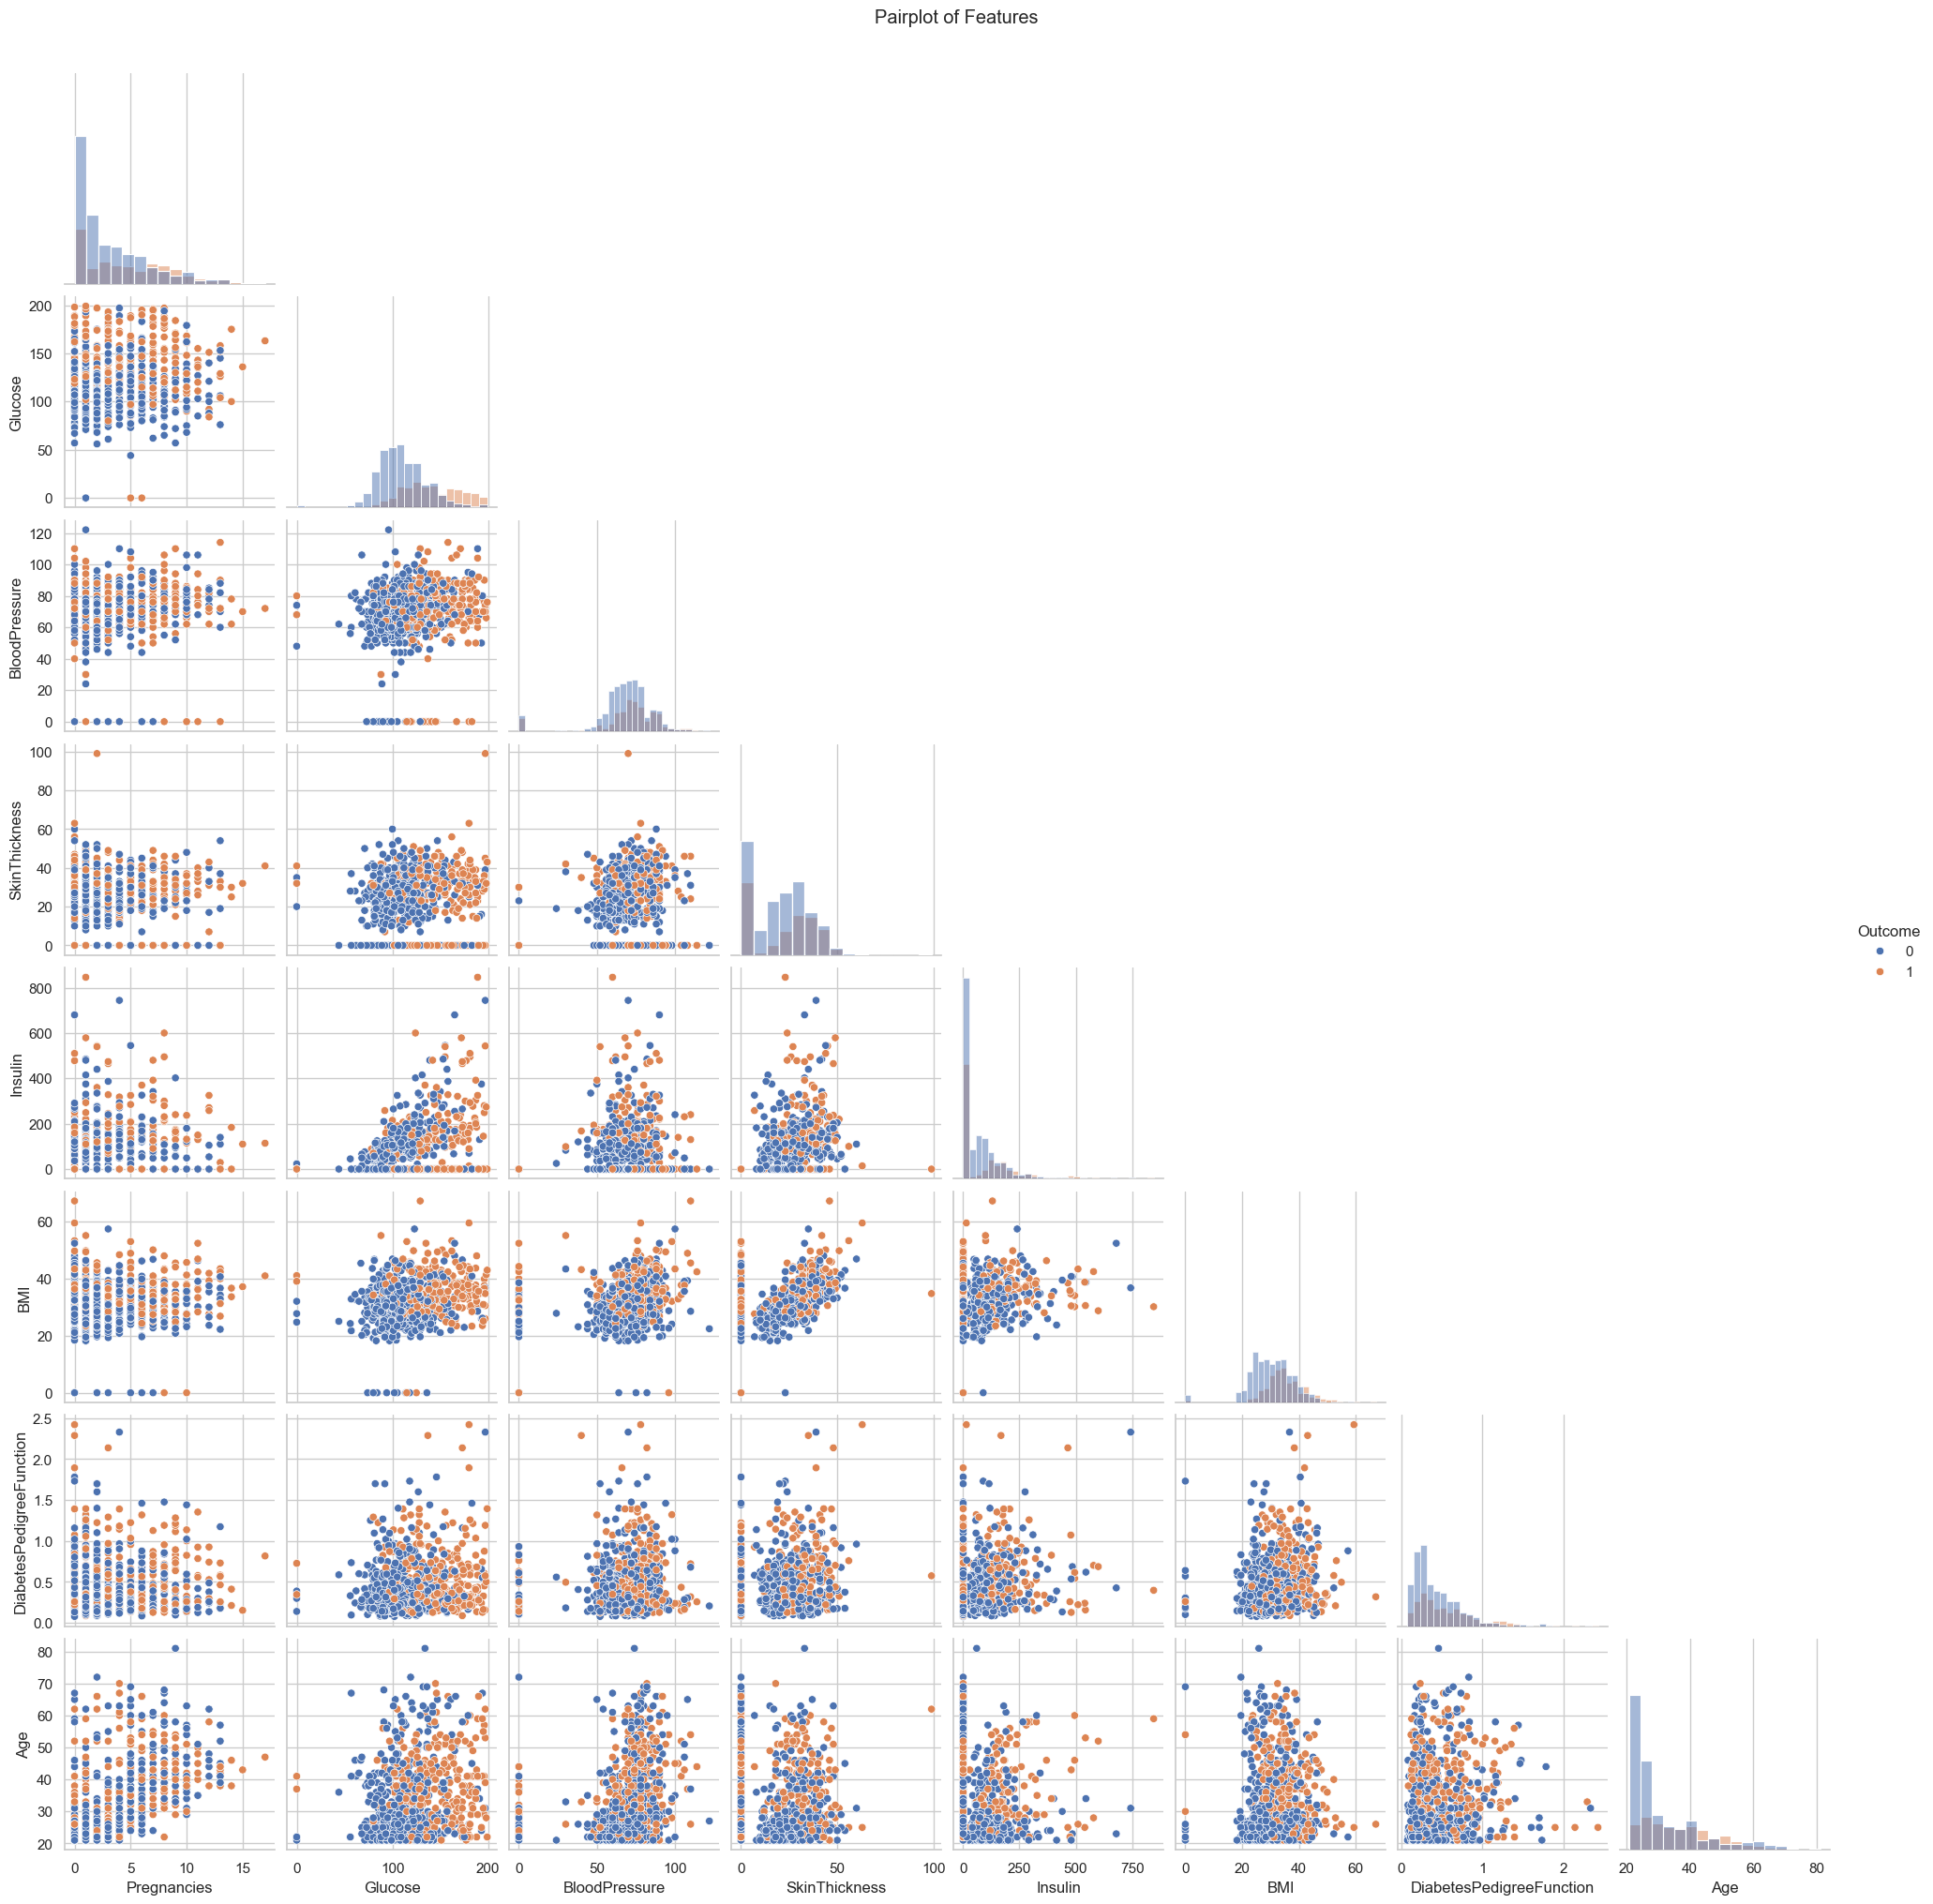

In [10]:
#Pairplot (فقط برای تعداد ستون کم یا انتخابی)
sns.pairplot(full_data, hue='Outcome', diag_kind='hist', corner=True)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()


C:\Users\livea\AppData\Local\Temp\ipykernel_4312\682059184.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Outcome', y=col, data=full_data, palette='Set2', ci='sd')
C:\Users\livea\AppData\Local\Temp\ipykernel_4312\682059184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y=col, data=full_data, palette='Set2', ci='sd')


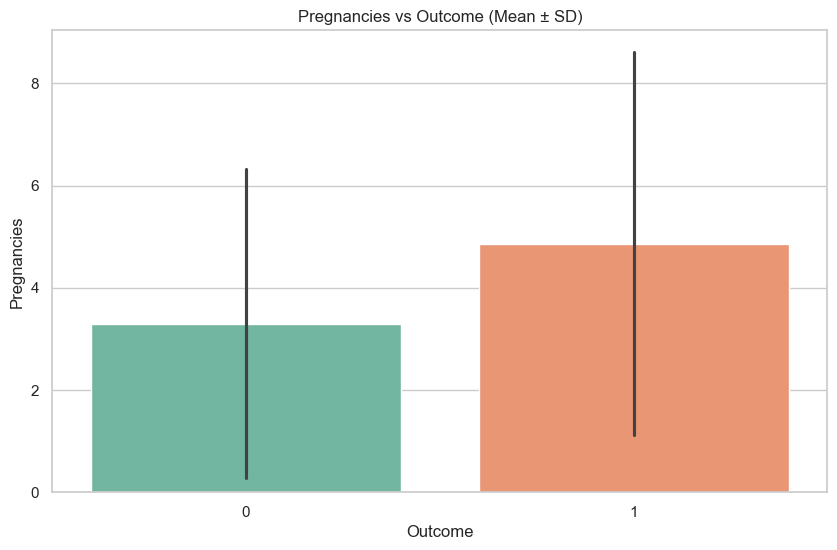

C:\Users\livea\AppData\Local\Temp\ipykernel_4312\682059184.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Outcome', y=col, data=full_data, palette='Set2', ci='sd')
C:\Users\livea\AppData\Local\Temp\ipykernel_4312\682059184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y=col, data=full_data, palette='Set2', ci='sd')


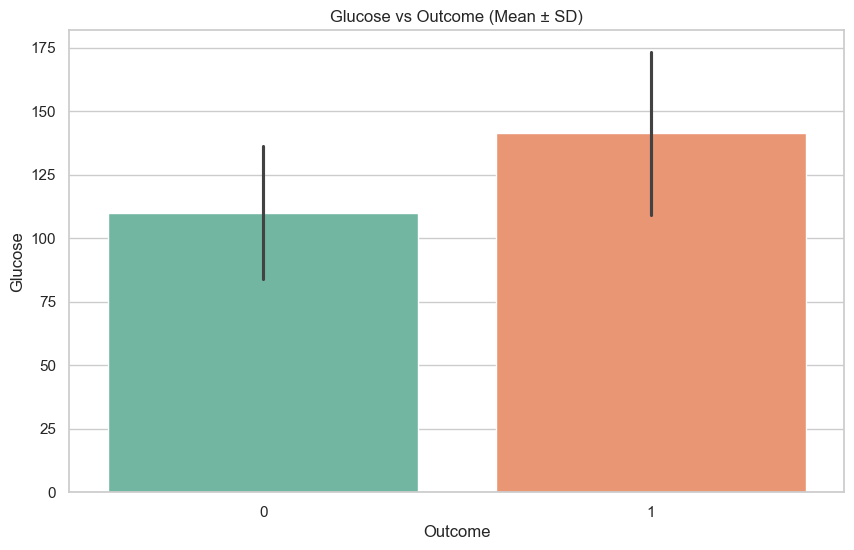

C:\Users\livea\AppData\Local\Temp\ipykernel_4312\682059184.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Outcome', y=col, data=full_data, palette='Set2', ci='sd')
C:\Users\livea\AppData\Local\Temp\ipykernel_4312\682059184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y=col, data=full_data, palette='Set2', ci='sd')


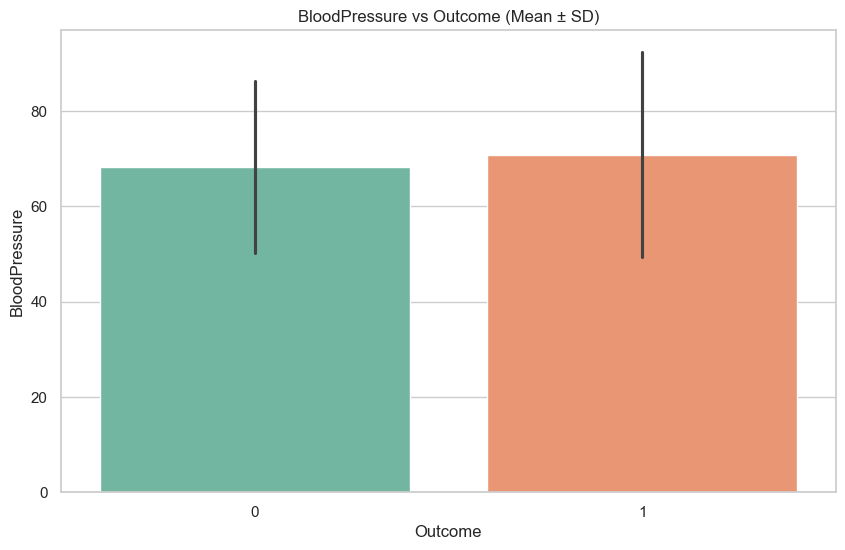

C:\Users\livea\AppData\Local\Temp\ipykernel_4312\682059184.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Outcome', y=col, data=full_data, palette='Set2', ci='sd')
C:\Users\livea\AppData\Local\Temp\ipykernel_4312\682059184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y=col, data=full_data, palette='Set2', ci='sd')


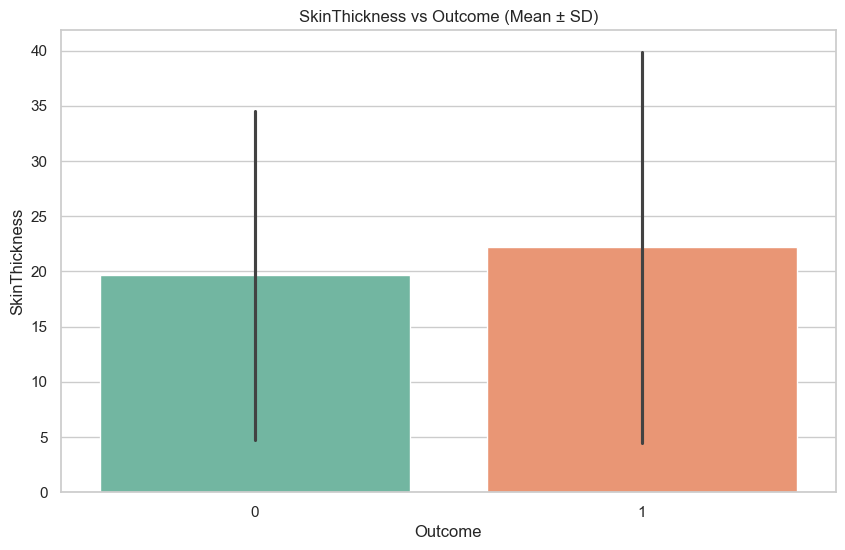

C:\Users\livea\AppData\Local\Temp\ipykernel_4312\682059184.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Outcome', y=col, data=full_data, palette='Set2', ci='sd')
C:\Users\livea\AppData\Local\Temp\ipykernel_4312\682059184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y=col, data=full_data, palette='Set2', ci='sd')


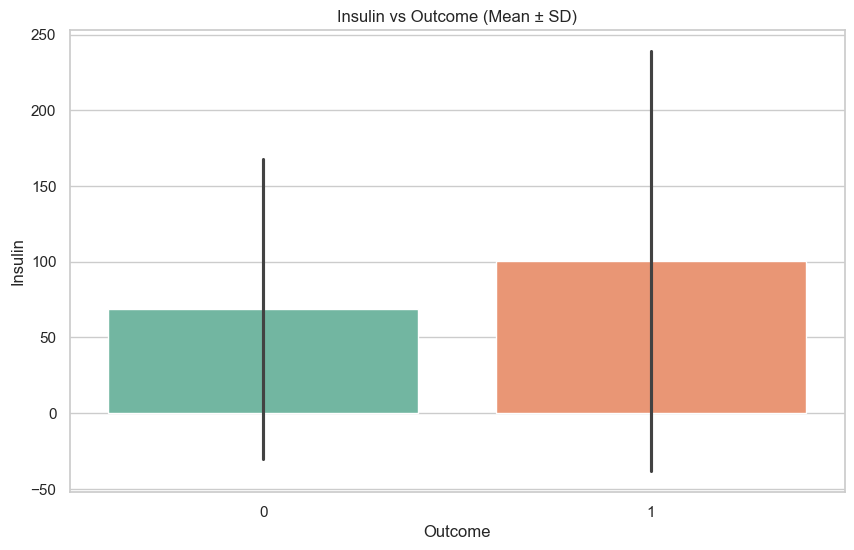

C:\Users\livea\AppData\Local\Temp\ipykernel_4312\682059184.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Outcome', y=col, data=full_data, palette='Set2', ci='sd')
C:\Users\livea\AppData\Local\Temp\ipykernel_4312\682059184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y=col, data=full_data, palette='Set2', ci='sd')


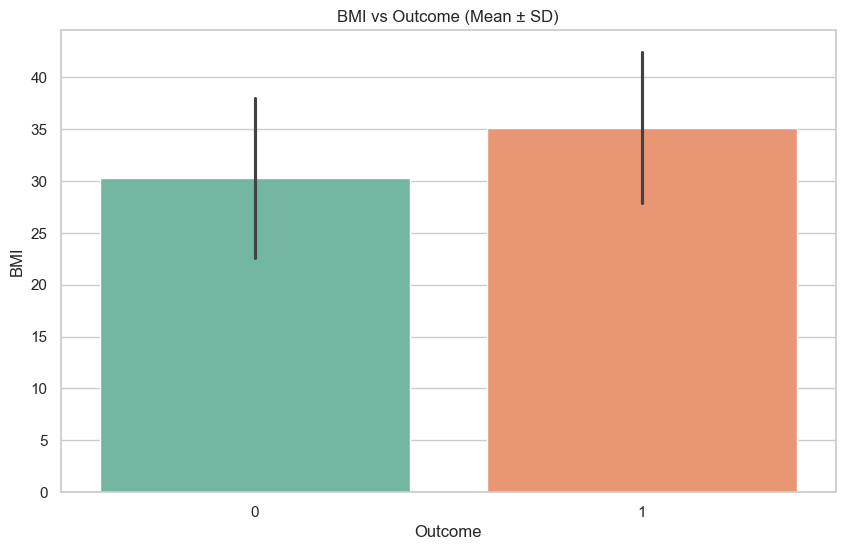

C:\Users\livea\AppData\Local\Temp\ipykernel_4312\682059184.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Outcome', y=col, data=full_data, palette='Set2', ci='sd')
C:\Users\livea\AppData\Local\Temp\ipykernel_4312\682059184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y=col, data=full_data, palette='Set2', ci='sd')


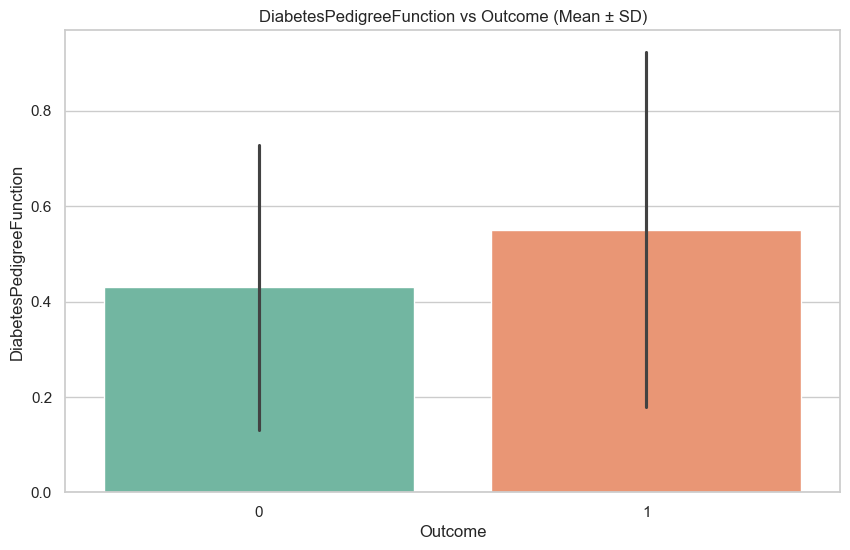

C:\Users\livea\AppData\Local\Temp\ipykernel_4312\682059184.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Outcome', y=col, data=full_data, palette='Set2', ci='sd')
C:\Users\livea\AppData\Local\Temp\ipykernel_4312\682059184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y=col, data=full_data, palette='Set2', ci='sd')


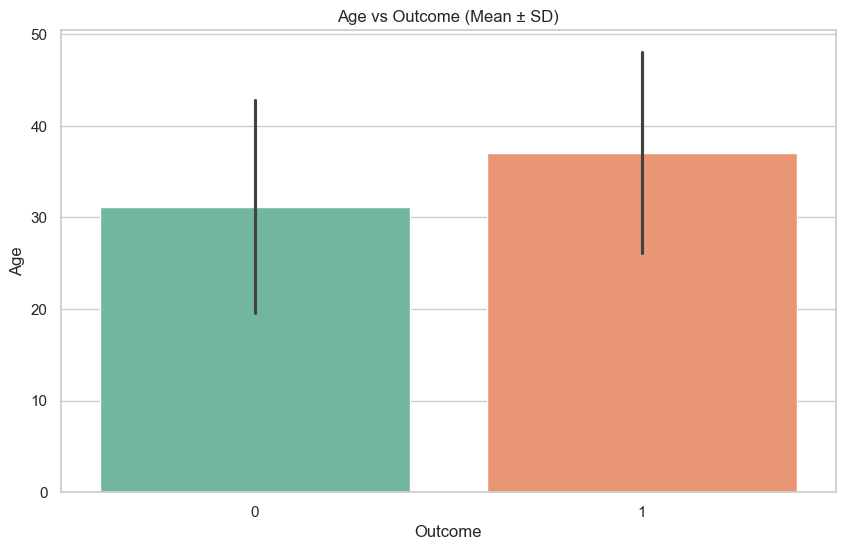

In [11]:
#Barplot برای بررسی میانگین هر ویژگی بر حسب Outcome
for col in full_data.columns[:-1]:
    plt.figure()
    sns.barplot(x='Outcome', y=col, data=full_data, palette='Set2', ci='sd')
    plt.title(f'{col} vs Outcome (Mean ± SD)')
    plt.show()


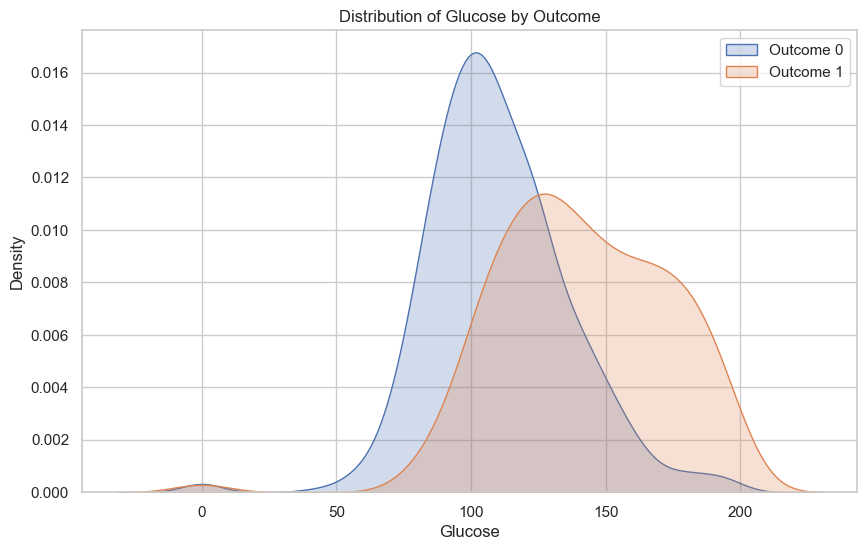

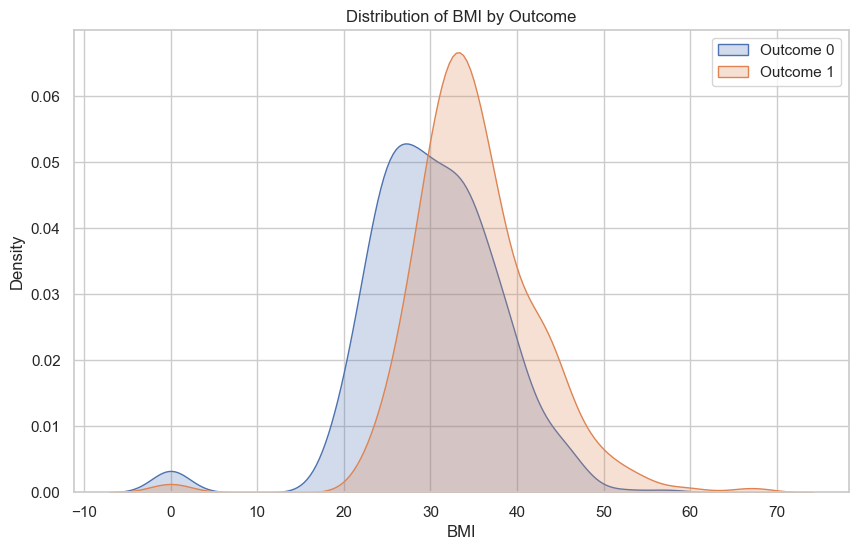

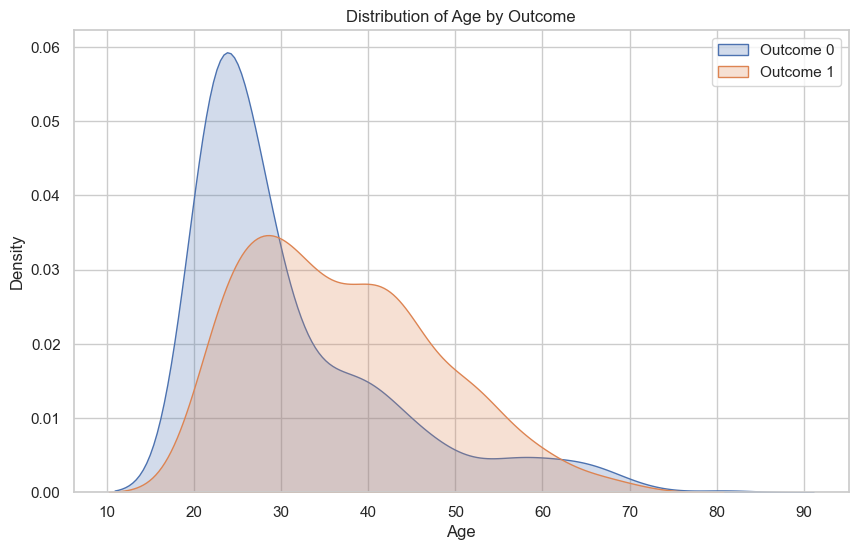

In [12]:
#KDE Plot (تراکم) برای برخی ویژگی‌های مهم
features = ['Glucose', 'BMI', 'Age']
for col in features:
    plt.figure()
    for outcome in [0, 1]:
        subset = full_data[full_data['Outcome'] == outcome]
        sns.kdeplot(subset[col], label=f'Outcome {outcome}', fill=True)
    plt.title(f'Distribution of {col} by Outcome')
    plt.legend()
    plt.show()


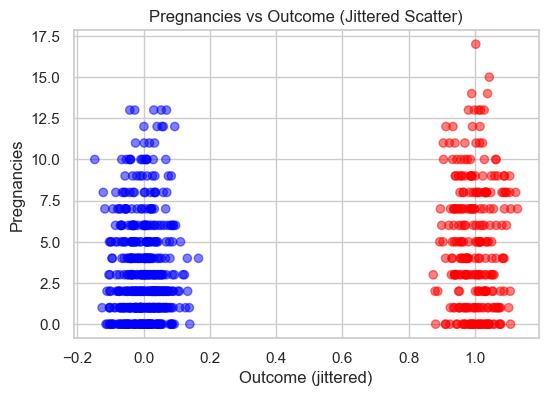

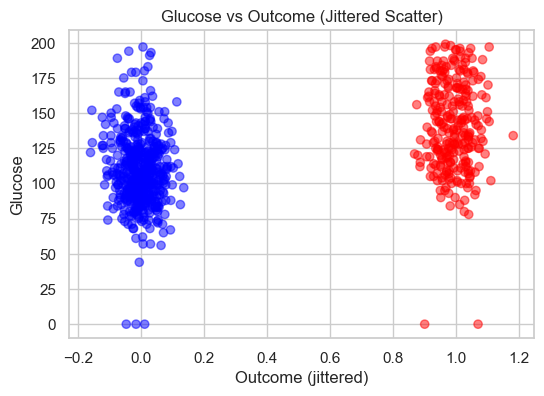

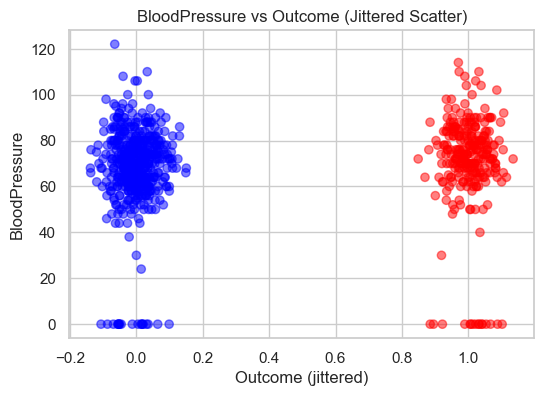

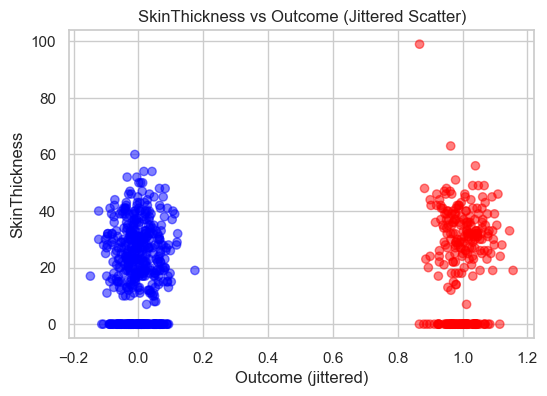

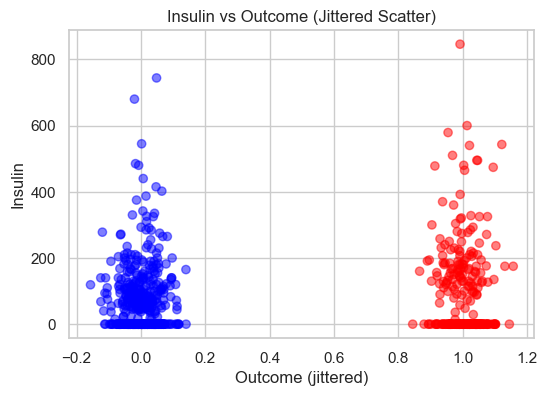

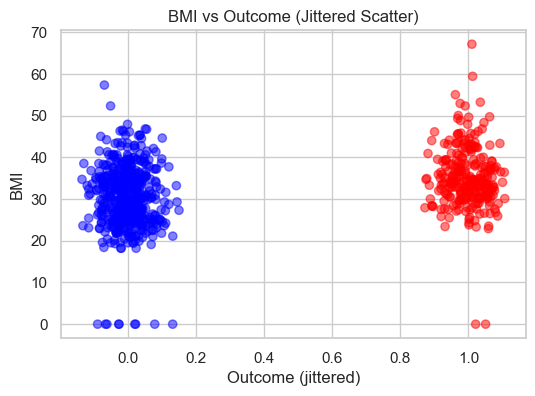

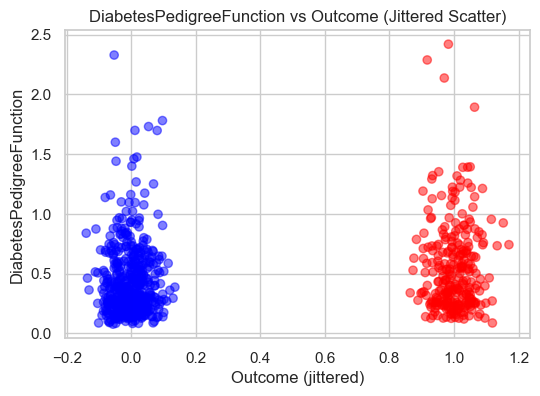

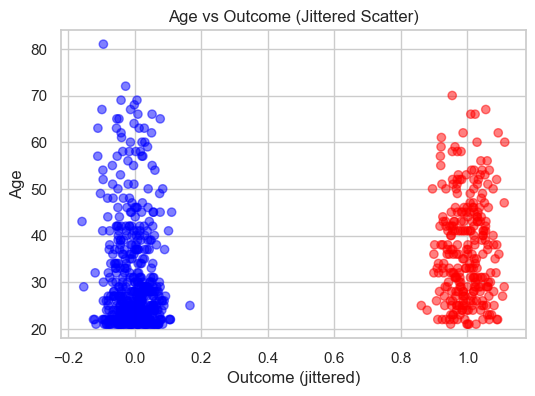

In [13]:
#scatter plot
import numpy as np

for col in full_data.columns[:-1]:
    plt.figure(figsize=(6, 4))
    y = full_data['Outcome'] + np.random.normal(0, 0.05, size=len(full_data))  # jitter دستی
    plt.scatter(y, full_data[col], alpha=0.5, c=full_data['Outcome'], cmap='bwr')
    plt.title(f'{col} vs Outcome (Jittered Scatter)')
    plt.xlabel('Outcome (jittered)')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()



C:\Users\livea\AppData\Local\Temp\ipykernel_4312\1436405540.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=full_data[target], y=full_data[feature], palette='Set2', alpha=0.8)


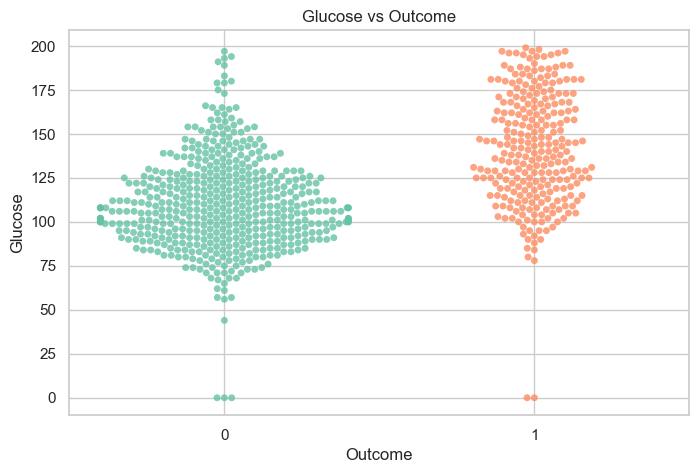

C:\Users\livea\AppData\Local\Temp\ipykernel_4312\1436405540.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=full_data[target], y=full_data[feature], palette='Set2', alpha=0.8)


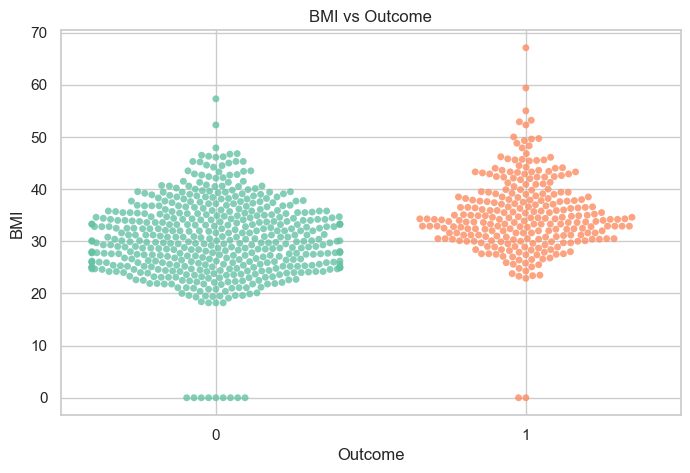

C:\Users\livea\AppData\Local\Temp\ipykernel_4312\1436405540.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=full_data[target], y=full_data[feature], palette='Set2', alpha=0.8)
C:\Apps\codeing\anaconda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Apps\codeing\anaconda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


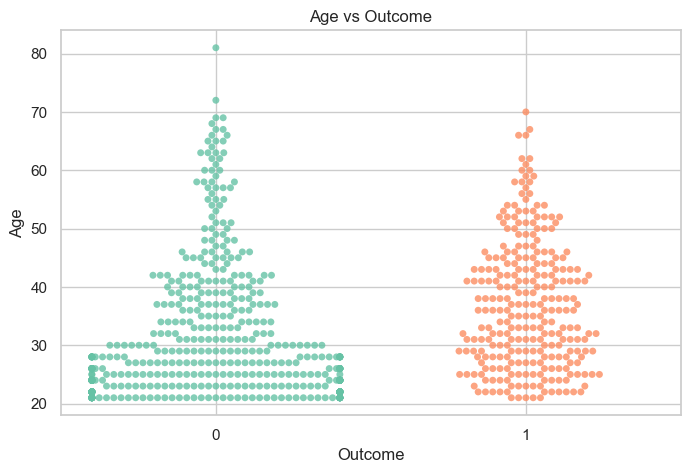

In [14]:
target = 'Outcome'
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.swarmplot(x=full_data[target], y=full_data[feature], palette='Set2', alpha=0.8)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()


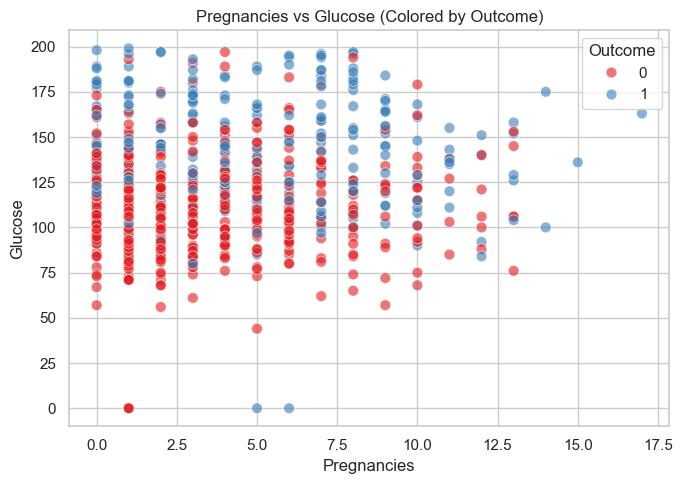

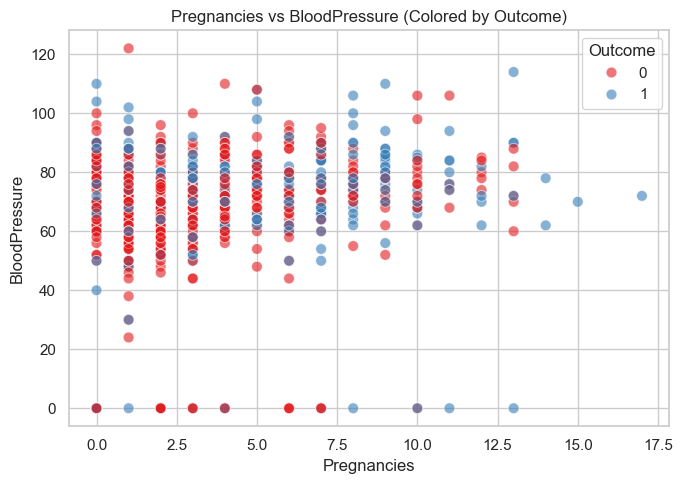

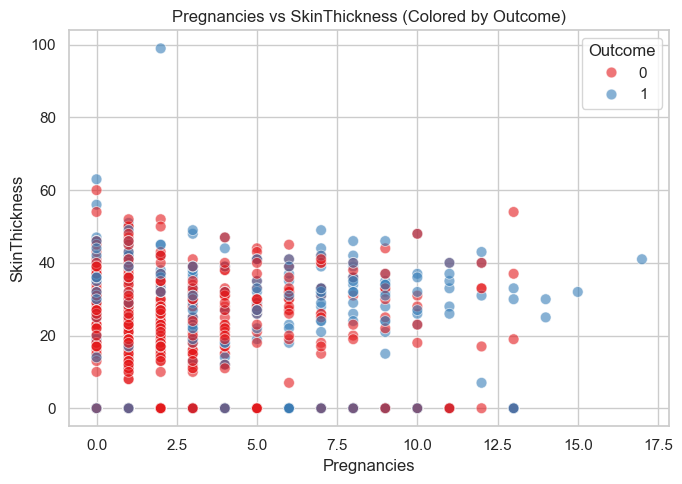

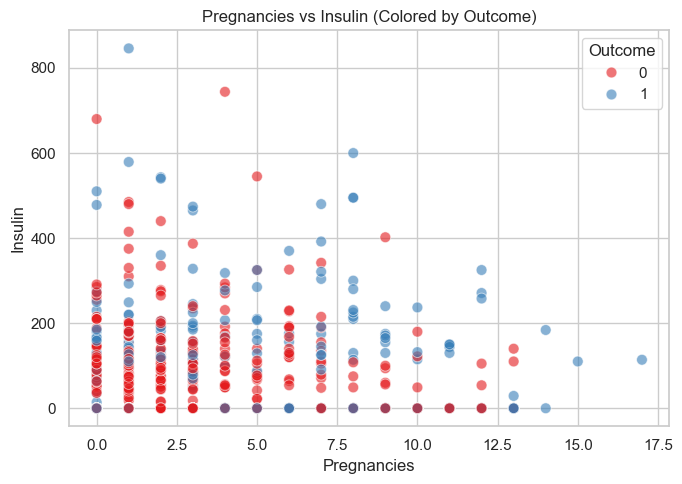

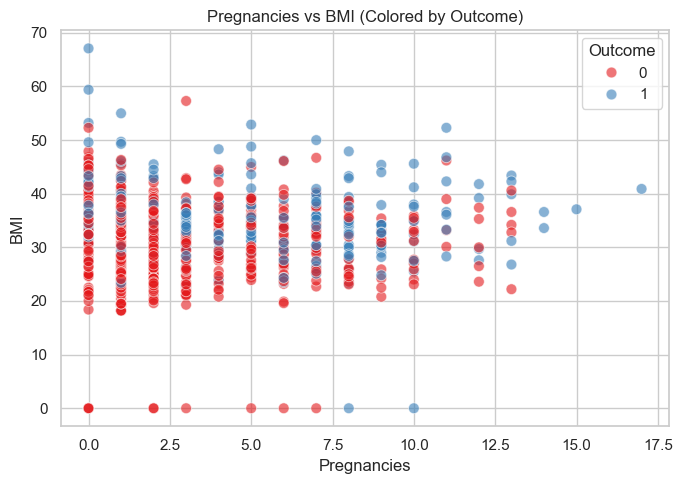

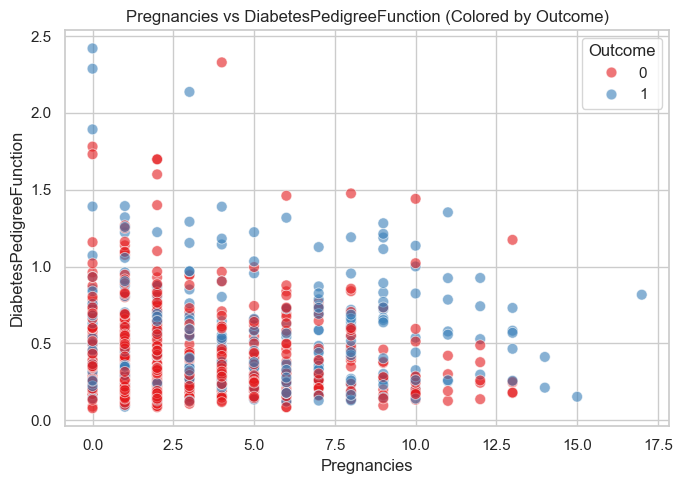

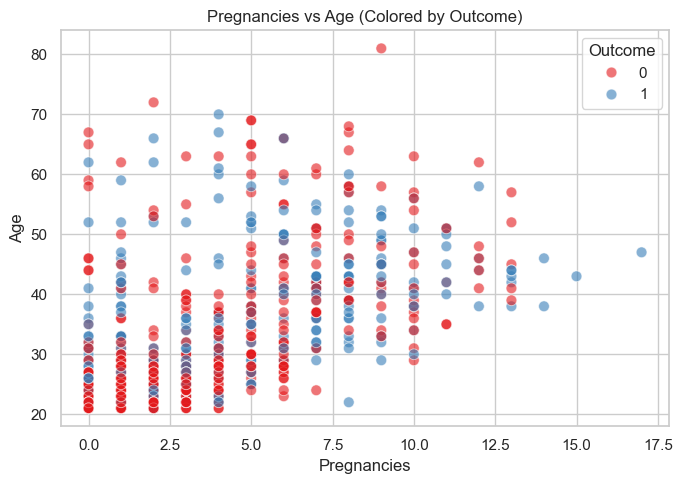

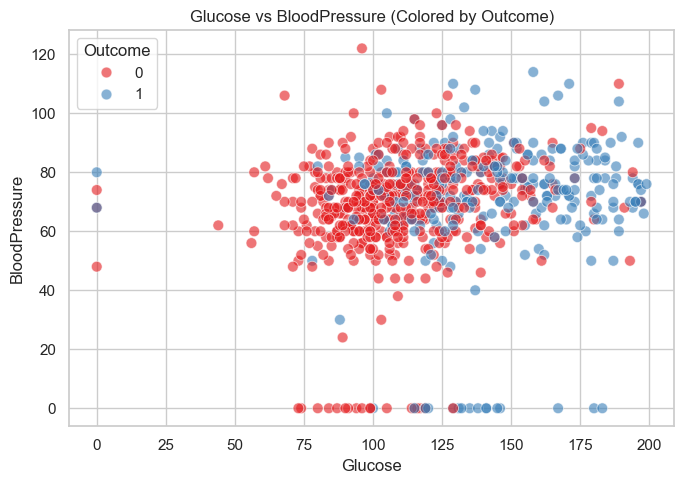

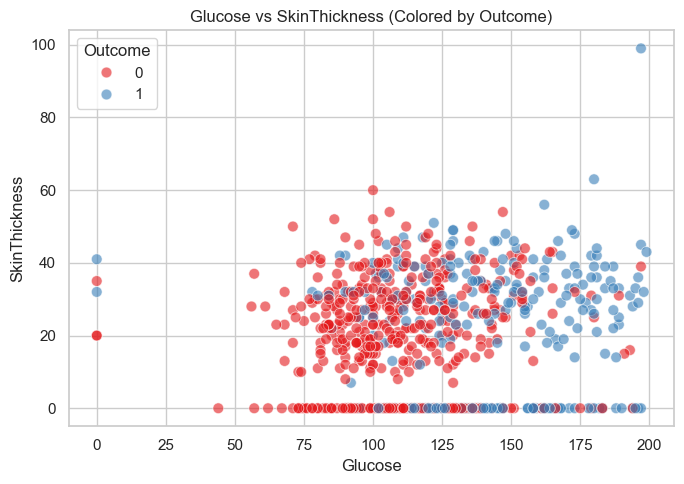

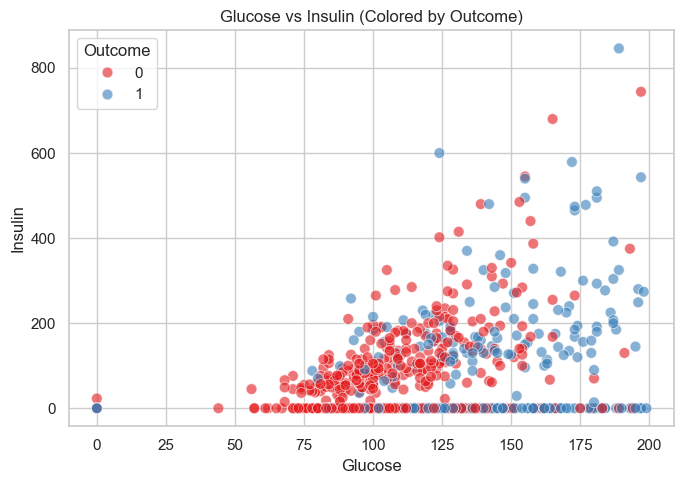

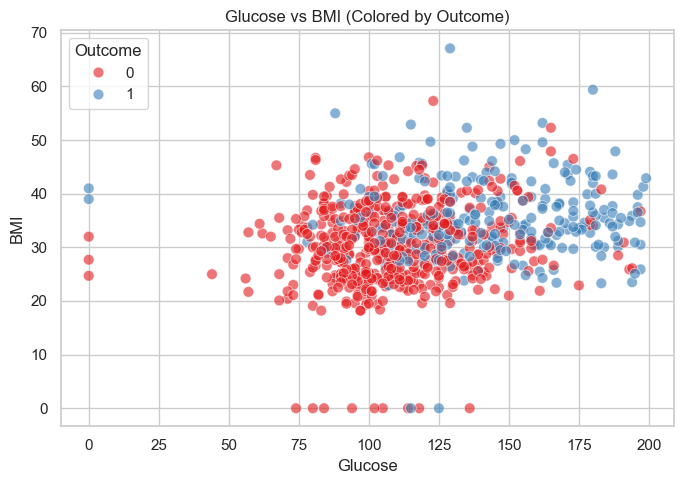

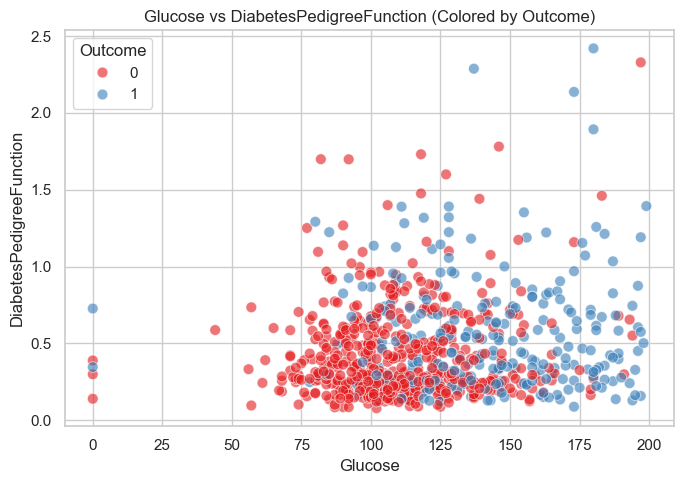

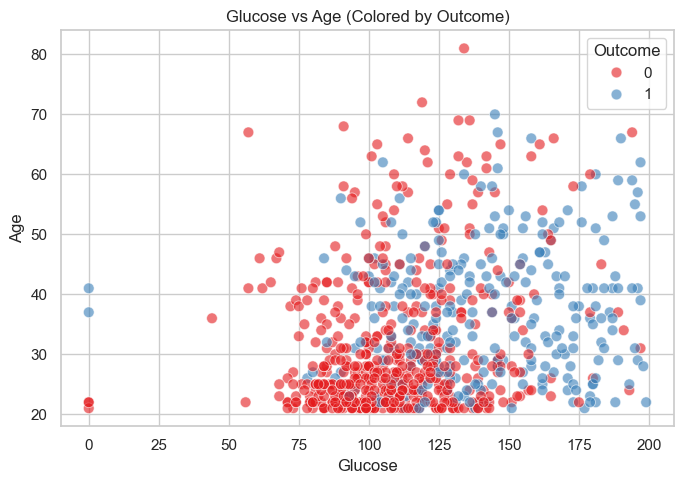

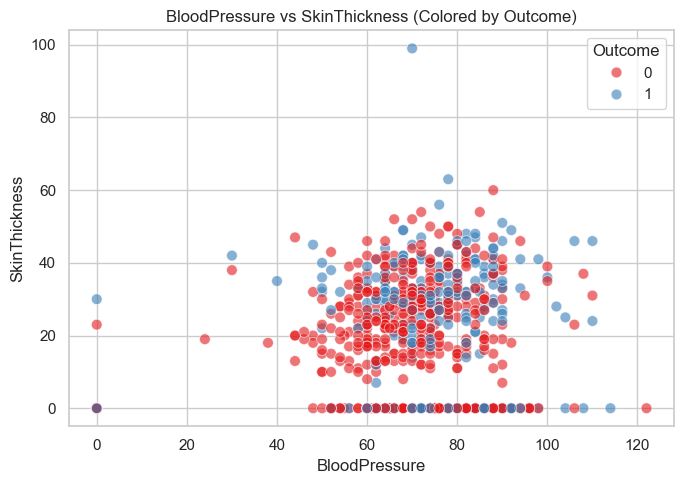

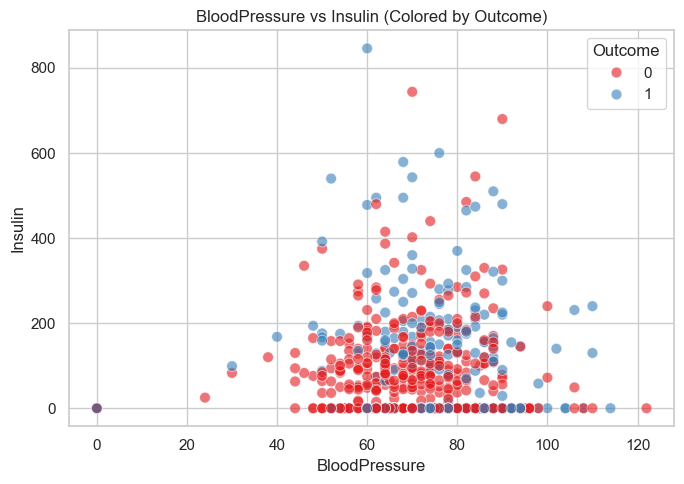

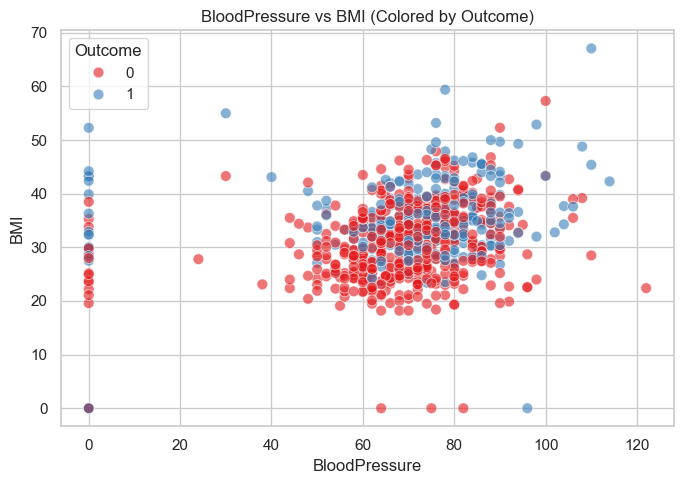

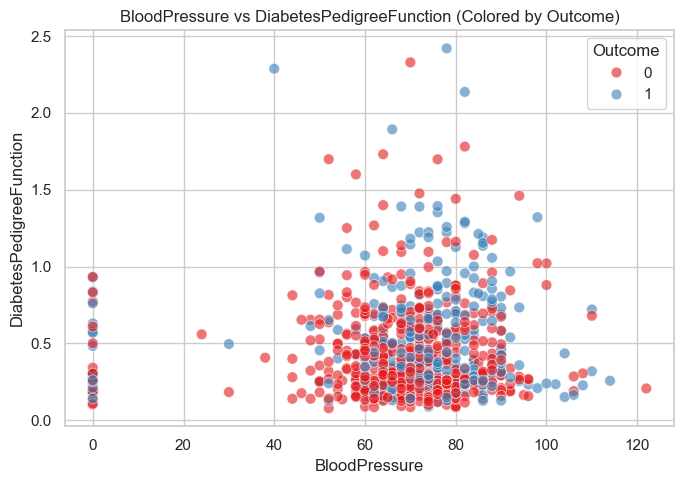

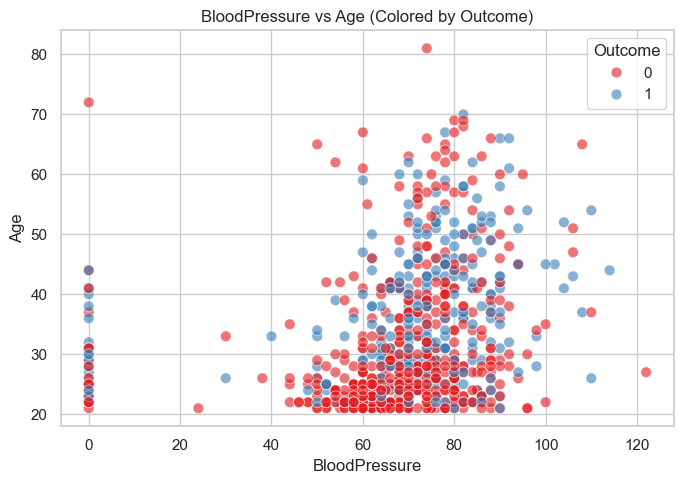

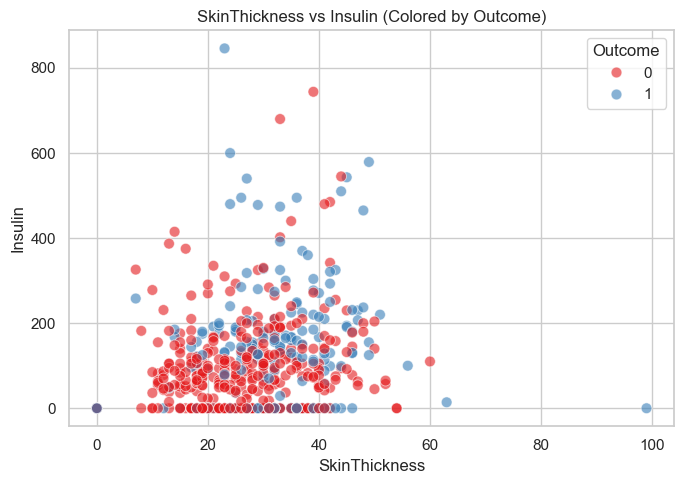

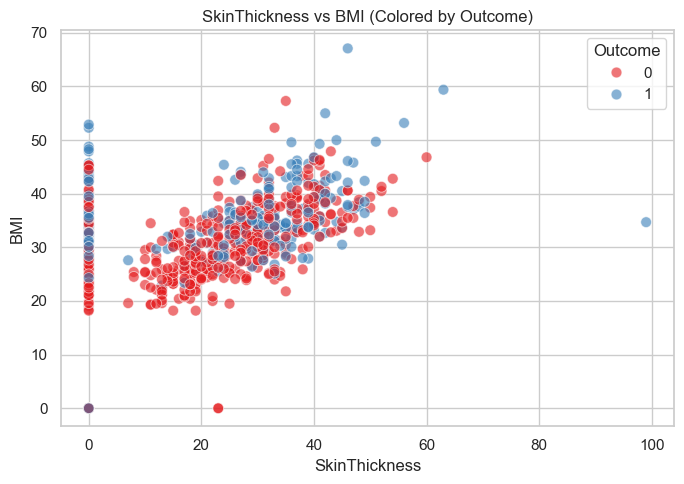

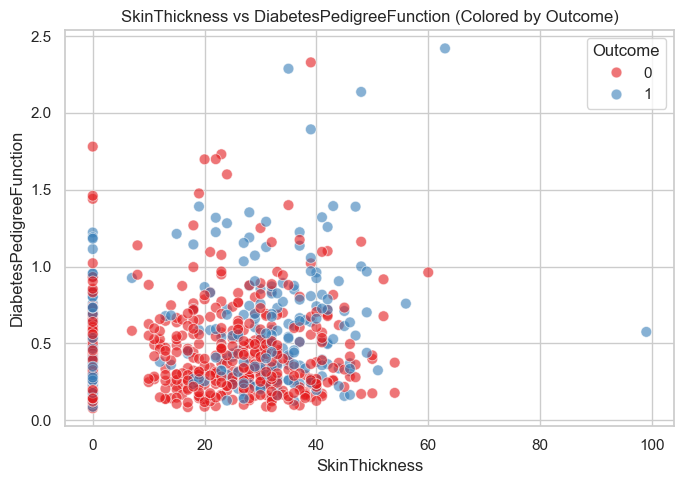

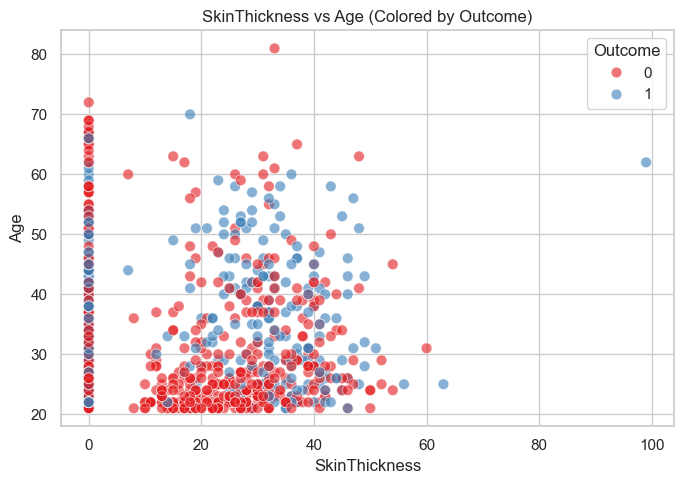

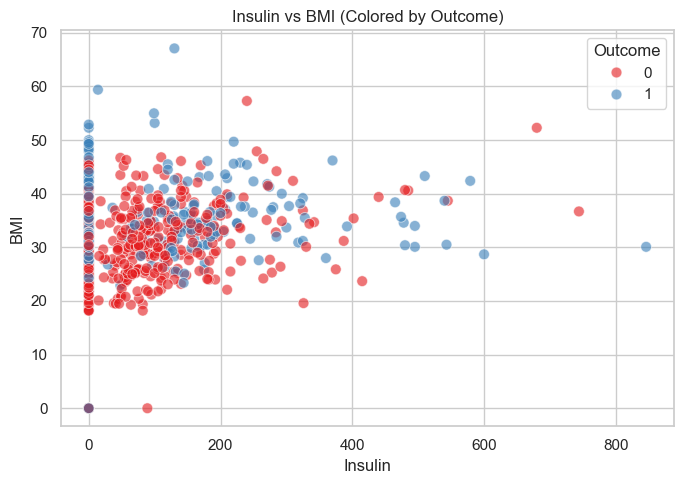

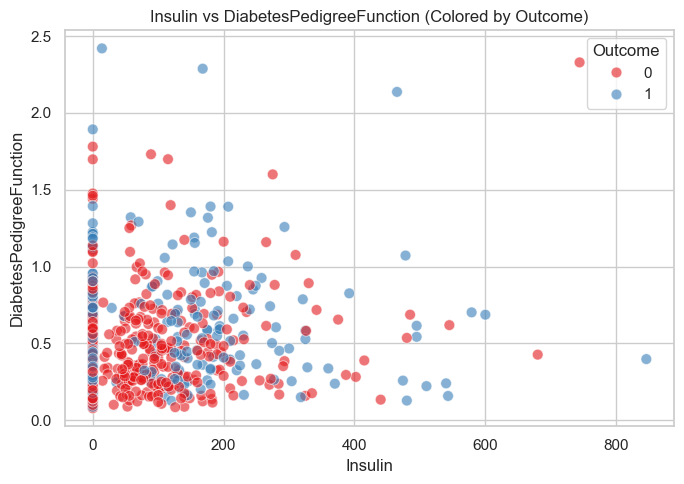

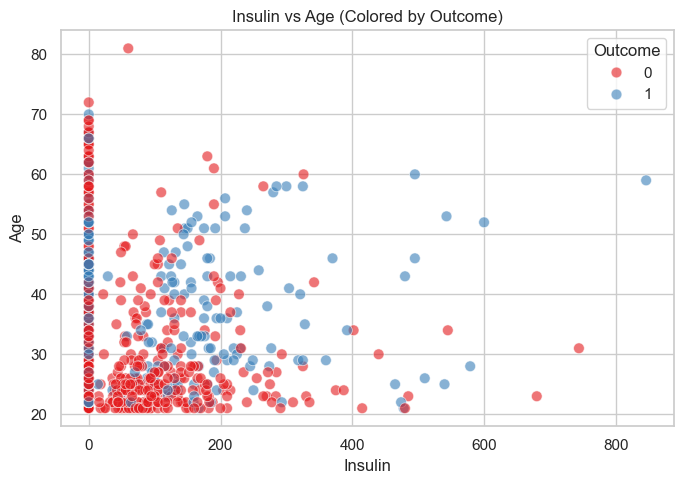

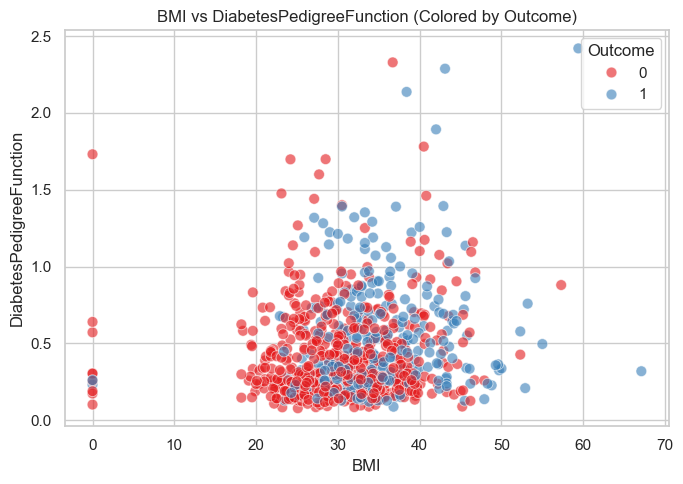

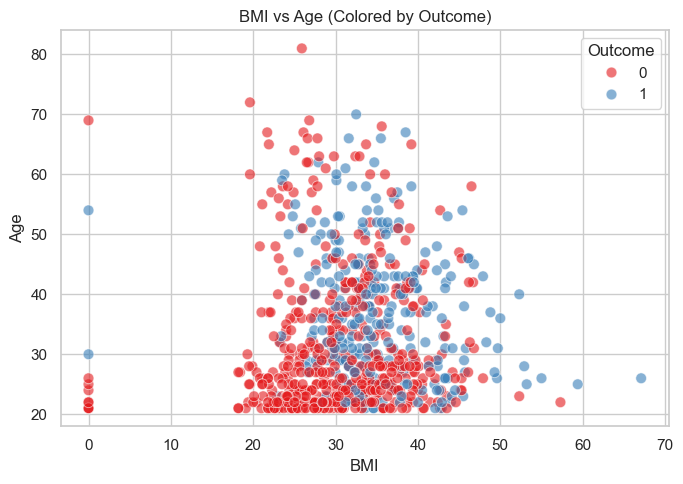

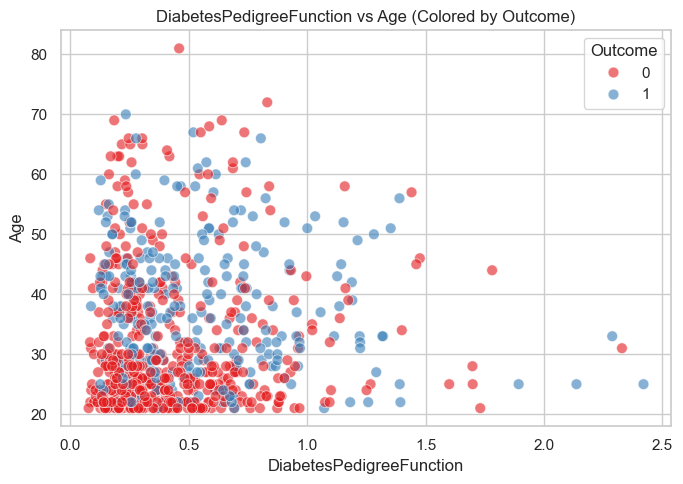

In [15]:
# رسم تمام ترکیب‌های ممکن از ۲ ویژگی عددی با رنگ Outcome

import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# فرض: full_data از قبل لود شده
target = 'Outcome'

# انتخاب ویژگی‌های عددی (به‌جز outcome)
features = [col for col in full_data.columns if col != target]

# گرفتن تمام ترکیب‌های ممکن از دو ویژگی
feature_pairs = list(itertools.combinations(features, 2))

# رسم نمودار برای هر جفت ویژگی
for x_feature, y_feature in feature_pairs:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=full_data, x=x_feature, y=y_feature, hue=target, palette='Set1', alpha=0.6, s=60)
    plt.title(f'{x_feature} vs {y_feature} (Colored by {target})')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [16]:
#بررسی تفاوت میانگین ویژگی‌ها بین کلاس‌های 0 و 1

import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

# فرض بر اینکه full_data لود شده
target = 'Outcome'
features = [col for col in full_data.columns if col != target]

# دسته‌بندی داده‌ها بر اساس Outcome
group_0 = full_data[full_data[target] == 0]
group_1 = full_data[full_data[target] == 1]

results = []

for feature in features:
    # انجام t-test
    stat, p_value = ttest_ind(group_0[feature], group_1[feature], equal_var=False)
    
    # محاسبه تفاوت میانگین بین دو گروه
    diff_mean = group_1[feature].mean() - group_0[feature].mean()
    
    results.append({
        'Feature': feature,
        'Mean(Outcome=1)': round(group_1[feature].mean(), 2),
        'Mean(Outcome=0)': round(group_0[feature].mean(), 2),
        'Diff': round(diff_mean, 2),
        'p-value': round(p_value, 6)
    })

# تبدیل به دیتافریم و مرتب‌سازی بر اساس مقدار تفکیک
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Diff', key=lambda x: abs(x), ascending=False)

# نمایش نتایج
print(results_df)


                    Feature  Mean(Outcome=1)  Mean(Outcome=0)   Diff   p-value
4                   Insulin           100.34            68.79  31.54  0.001047
1                   Glucose           141.26           109.98  31.28  0.000000
7                       Age            37.07            31.19   5.88  0.000000
5                       BMI            35.14            30.30   4.84  0.000000
2             BloodPressure            70.82            68.18   2.64  0.087354
3             SkinThickness            22.16            19.66   2.50  0.049356
0               Pregnancies             4.87             3.30   1.57  0.000000
6  DiabetesPedigreeFunction             0.55             0.43   0.12  0.000006


Diff زیاد و p-value کوچک → یعنی این ویژگی احتمالاً برای مدل خیلی مهمه 

Diff نزدیک به صفر یا p-value بالا → احتمالاً این ویژگی در تشخیص Outcome خیلی مؤثر نیست 

| Feature                           | تفسیر                                                                                                           |
| --------------------------------- | --------------------------------------------------------------------------------------------------------------- |
| **Insulin (Diff = 31.54)**        | افرادی که Outcome=1 دارن، به‌طور میانگین انسولین بالاتری دارن. اثر بسیار قوی و **معنادار آماری** (p < 0.01). ✔️ |
| **Glucose (Diff = 31.28)**        | قوی‌ترین فیچر؛ میزان قند خون نقش خیلی زیادی داره. **فوق‌العاده مهم برای مدل**. ✔️✔️                             |
| **Age (Diff = 5.88)**             | افراد دیابتی به طور میانگین مسن‌تر هستن. پس سن هم خیلی موثره. ✔️                                                |
| **BMI (Diff = 4.84)**             | شاخص توده بدنی بالاتر → ارتباط مستقیم با Outcome. ✔️                                                            |
| **BloodPressure / SkinThickness** | تفاوت هست ولی کم‌تر و **p-value نزدیک مرز معناداریه**. می‌تونی نگه داری ولی خیلی حیاتی نیستن. ❕                 |
| **Pregnancies**                   | تفاوت معنی‌دار هست ولی نه خیلی زیاد. شاید به‌تنهایی قوی نباشه ولی در ترکیب با فیچرهای دیگه کمک کنه. ❕           |
| **DiabetesPedigreeFunction**      | تاثیرش کمه ولی **معنادار** هست. یعنی اطلاعات ژنتیکی هم تا حدی مهمه. ❕✔️                                         |

 فیچرهای خیلی مهم برای مدل:

    ✅ Glucose

    ✅ Insulin

    ✅ BMI

    ✅ Age


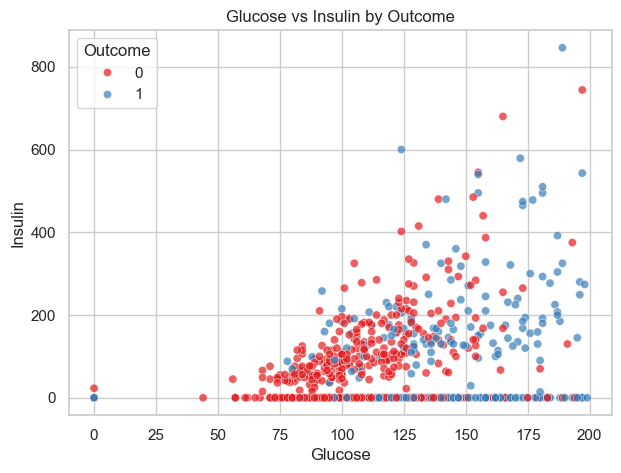

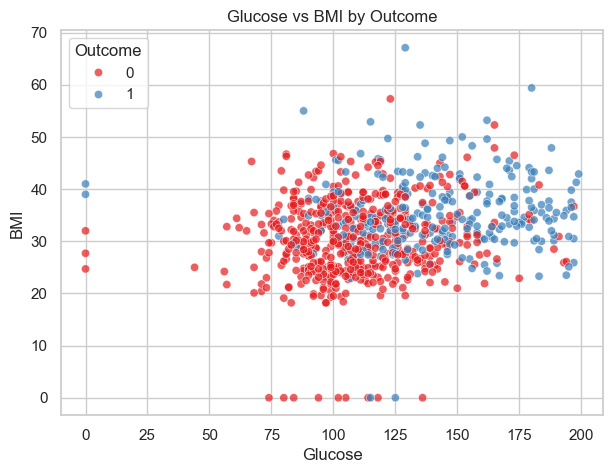

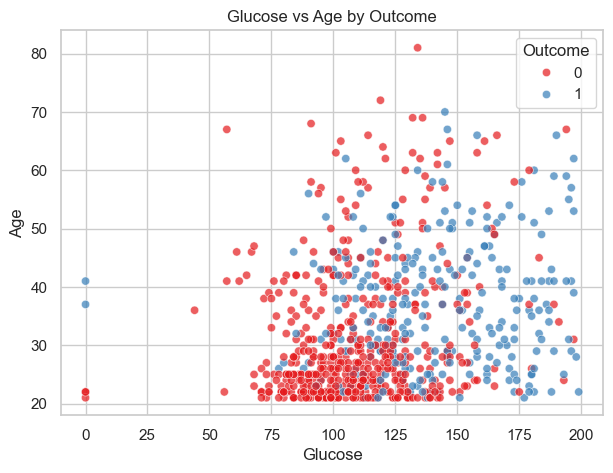

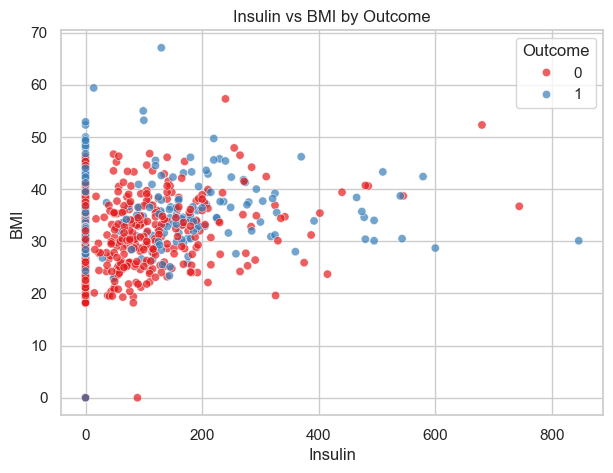

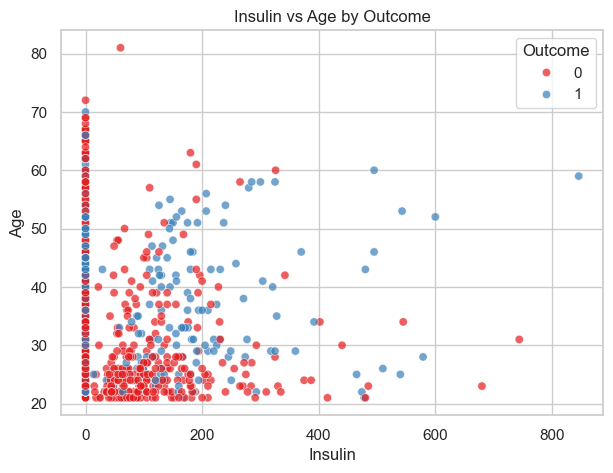

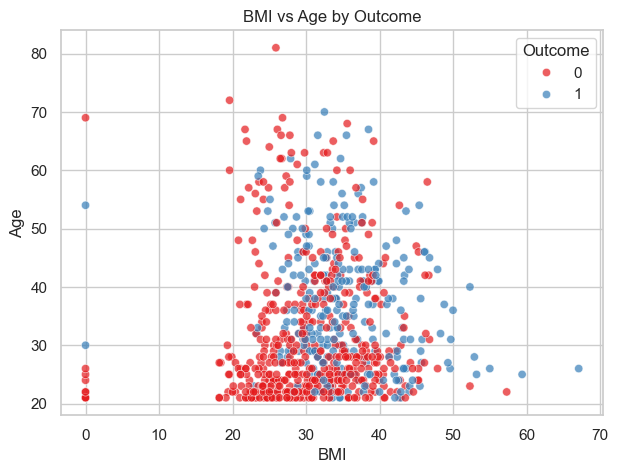

In [17]:
# فقط برای Top 4 ویژگی، scatterplot رنگی نسبت به Outcome بکشیم

top_features = ['Glucose', 'Insulin', 'BMI', 'Age']
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

pairs = list(itertools.combinations(top_features, 2))

for x, y in pairs:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=full_data, x=x, y=y, hue='Outcome', palette='Set1', alpha=0.7)
    plt.title(f'{x} vs {y} by Outcome')
    plt.grid(True)
    plt.show()


In [21]:
# اگر y یک سری pandas باشه
#print(y.value_counts())

# یا به صورت مرتب شده
#print(y.value_counts().sort_index())

# برای نمایش درصد هم میتونی بگیری
#print(y.value_counts(normalize=True))


کلاس ها نزدیکی زیادی به هم دارن پس قطعا باید این مشکل حل کنیم و نکته بعدی که وجود داره کلاس ها بالانس نیستن و نمونه منفی یا صفر حدودا دو برابر نمونه مثبت و یم هست 
پس باید برای داده وقت بیشتری بزاریم . فیچر های جدیدی بسازیم و کلاس هارا برابر کنیم 

در ابتدا با همین داده و بدون هیچ تغییری وارد روند مدل سازی میشیم و بهترین مدل را پیدا میکنیم و میسنجیمش . در مرحله بعد روی داده کار میکنیم که ببینیم چهقدر میتونه تفاوت ایجاد کنه
پس بریم برای مدل 

اول داده را تقسیم کنیم برای سنجش و اموزش مدل 

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define features and target
X = full_data.drop("Outcome", axis=1)
y = full_data["Outcome"]

# Split the dataset into train (60%), validation (20%) and test (20%) sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# Output the shape of the splits
X_train.shape, X_val.shape, X_test.shape , y_train.shape , y_val.shape , y_test.shape

((460, 8), (154, 8), (154, 8), (460,), (154,), (154,))

In [23]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

بررس اولیه مدل ها 

In [24]:
# Define and train models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP (Neural Net)": MLPClassifier(max_iter=1000, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


===== Logistic Regression =====
Accuracy: 0.7272727272727273
F1 Score: 0.5714285714285714
Confusion Matrix:
 [[84 16]
 [26 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.64      0.52      0.57        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154


===== Random Forest =====
Accuracy: 0.7207792207792207
F1 Score: 0.5742574257425742
Confusion Matrix:
 [[82 18]
 [25 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       100
           1       0.62      0.54      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.72      0.72       154


===== SVM =====
Accuracy: 0.7532467532467533


C:\Apps\codeing\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

modelLR = LogisticRegression(max_iter=1000)
modelLR.fit(X_train, y_train)
y_pred = modelLR.predict(X_val)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Logistic Regression:
Accuracy: 0.7987012987012987
F1 Score: 0.6804123711340206
Confusion Matrix:
 [[90 10]
 [21 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       100
           1       0.77      0.61      0.68        54

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



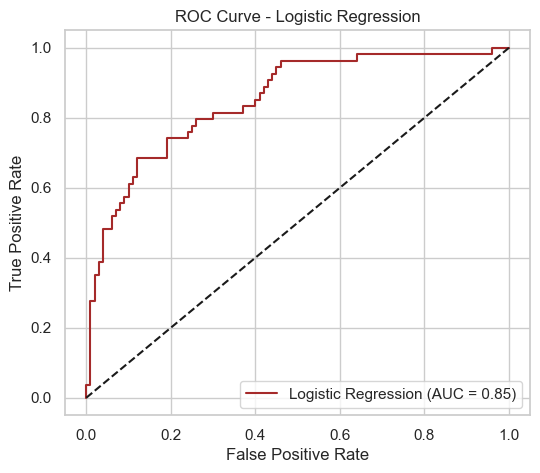

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba = modelLR.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_proba)
auc = roc_auc_score(y_val, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.2f})", color='brown')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [27]:
from sklearn.tree import DecisionTreeClassifier

modelDTC = DecisionTreeClassifier(random_state=42)
modelDTC.fit(X_train, y_train)
y_pred = modelDTC.predict(X_val)

print("Decision Tree:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Decision Tree:
Accuracy: 0.7597402597402597
F1 Score: 0.6666666666666666
Confusion Matrix:
 [[80 20]
 [17 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       100
           1       0.65      0.69      0.67        54

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



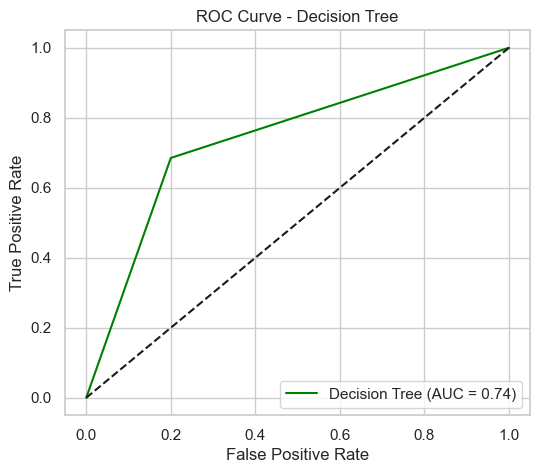

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# پیش‌بینی احتمال
y_proba = modelDTC.predict_proba(X_val)[:, 1]

# محاسبه ROC و AUC
fpr, tpr, _ = roc_curve(y_val, y_proba)
auc = roc_auc_score(y_val, y_proba)

# رسم نمودار
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [29]:
from sklearn.ensemble import RandomForestClassifier

modelRFC = RandomForestClassifier(random_state=42)
modelRFC.fit(X_train, y_train)
y_pred = modelRFC.predict(X_val)

print("Random Forest:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Random Forest:
Accuracy: 0.7597402597402597
F1 Score: 0.6336633663366337
Confusion Matrix:
 [[85 15]
 [22 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



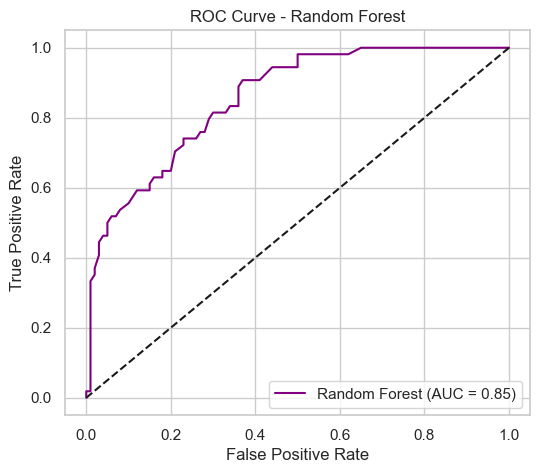

In [30]:
y_proba = modelRFC.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_proba)
auc = roc_auc_score(y_val, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.2f})", color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [31]:
from xgboost import XGBClassifier

modelXGB = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
modelXGB.fit(X_train, y_train)
y_pred = modelXGB.predict(X_val)

print("XGBoost:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


XGBoost:
Accuracy: 0.7272727272727273
F1 Score: 0.6037735849056604
Confusion Matrix:
 [[80 20]
 [22 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.62      0.59      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



C:\Apps\codeing\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:18:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


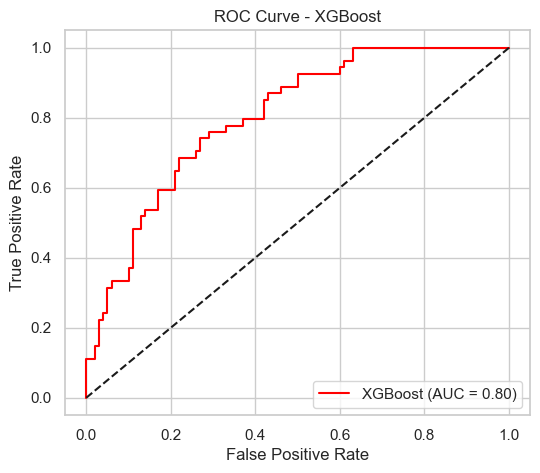

In [32]:
y_proba = modelXGB.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_proba)
auc = roc_auc_score(y_val, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc:.2f})", color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [33]:
from sklearn.neighbors import KNeighborsClassifier

modelKN = KNeighborsClassifier(n_neighbors=5)
modelKN.fit(X_train, y_train)
y_pred = modelKN.predict(X_val)

print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


K-Nearest Neighbors:
Accuracy: 0.7272727272727273
F1 Score: 0.58
Confusion Matrix:
 [[83 17]
 [25 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       100
           1       0.63      0.54      0.58        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



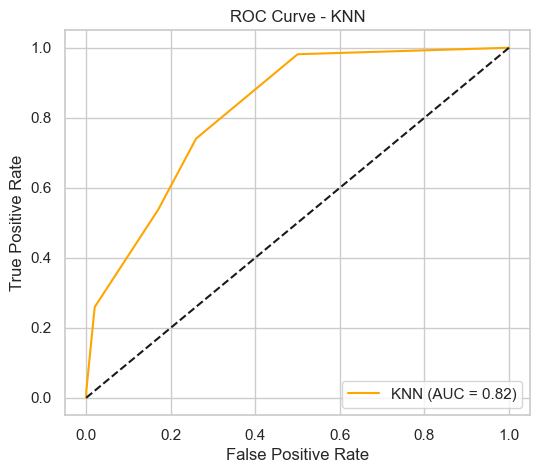

In [34]:
y_proba = modelKN.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_proba)
auc = roc_auc_score(y_val, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"KNN (AUC = {auc:.2f})", color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# تعریف مدل SVM
modelSVM = SVC(probability=True, random_state=42)

# آموزش مدل
modelSVM.fit(X_train, y_train)

# پیش‌بینی روی دادهٔ اعتبارسنجی (validation)
y_pred = modelSVM.predict(X_val)

# نمایش متریک‌ها
print("SVM (Support Vector Machine):")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


SVM (Support Vector Machine):
Accuracy: 0.8051948051948052
F1 Score: 0.6875
Confusion Matrix:
 [[91  9]
 [21 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       100
           1       0.79      0.61      0.69        54

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



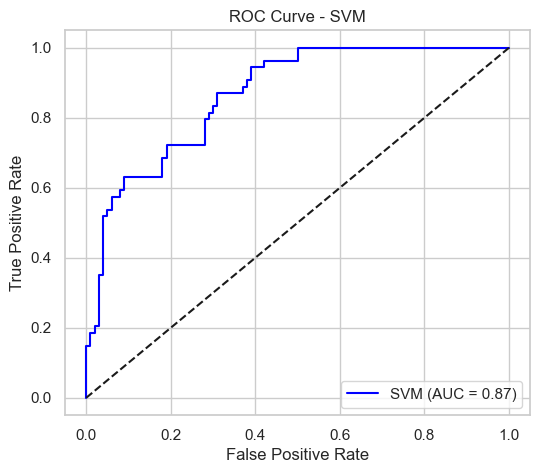

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba = modelSVM.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_proba)
auc = roc_auc_score(y_val, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"SVM (AUC = {auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


 هر چی AUC به 1 نزدیک‌تر باشه، بهتره — یعنی مدل به درستی کلاس‌ها رو از هم تفکیک می‌کنه.
هرچی بیشتر به بالا و سمت چپ نمودار نزدیک باشه، بهتره.ROC Curve

در اینجا مدل های لاجستیک رگشن و سی وس ام بهترین عملکرد را دارن 
بهترین کار اینه ببینیم با هایپرتیون کردن این دو مدل کدوم بهتر تنیجه میدن 

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = [
    {'penalty': [None], 'solver': ['lbfgs', 'newton-cg', 'sag'], 'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [500, 1000]},
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [500, 1000]},
    {'penalty': ['l2'], 'solver': ['lbfgs', 'newton-cg', 'sag', 'liblinear', 'saga'], 'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [500, 1000]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.1, 0.5, 0.7, 0.9], 'C': [0.001, 0.01, 0.1, 1], 'max_iter': [500, 1000]}
]

model_lr = LogisticRegression()

grid_search_lr = GridSearchCV(model_lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

print("Best Logistic Regression Params:", grid_search_lr.best_params_)

best_model = grid_search_lr.best_estimator_
y_pred = best_model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Fitting 5 folds for each of 132 candidates, totalling 660 fits
Best Logistic Regression Params: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.7987012987012987
F1 Score: 0.6804123711340206
Confusion Matrix:
 [[90 10]
 [21 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       100
           1       0.77      0.61      0.68        54

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# پارامترها برای جستجو
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4],  
    'shrinking': [True, False],
    'probability': [True],
    'tol': [1e-3, 1e-4],
    'max_iter': [-1, 1000, 2000]
}


grid_svm = GridSearchCV(SVC(probability=True, random_state=42),
                        param_grid=param_grid_svm,
                        scoring='f1', cv=5, n_jobs=-1)
grid_svm.fit(X_train, y_train)

# بهترین مدل
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_val)
y_proba_svm = best_svm.predict_proba(X_val)[:, 1]

print("Best SVM Params:", grid_svm.best_params_)
print("Accuracy:", accuracy_score(y_val, y_pred_svm))
print("F1 Score:", f1_score(y_val, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_svm))
print("Classification Report:\n", classification_report(y_val, y_pred_svm))

# رسم ROC
RocCurveDisplay.from_predictions(y_val, y_proba_svm)
plt.title("ROC Curve - SVM")
plt.grid(True)
plt.show()


تحلیل دقیق‌تر:

    Logistic Regression دقت کمی بالاتر داره.

    SVM Recall برای کلاس ۱ بهتره (یعنی بیماران واقعی بیشتری رو شناسایی کرده).

    Precision در Logistic بهتره → یعنی درصد بیماران تشخیص‌داده‌شده‌ای که واقعا بیمار بودن، بیشتره.

بنابراین:

    اگه جلوگیری از خطای مثبت کاذب (false positive) برات مهمه → Logistic Regression.

    اگه جلوگیری از خطای منفی کاذب (false negative) مهم‌تره (یعنی از دست ندادن بیماران واقعی) → SVM.

In [39]:
best_logistic = best_model

In [40]:
# ترکیب داده‌های آموزش و اعتبارسنجی برای آموزش نهایی
import numpy as np

X_final_train = np.vstack((X_train, X_val))
y_final_train = np.hstack((y_train, y_val))

# آموزش مدل نهایی
best_logistic_final = best_logistic  # استفاده از همون مدل انتخاب‌شده
best_logistic_final.fit(X_final_train, y_final_train)


LogisticRegression(C=1, max_iter=500, solver='liblinear')

Final Evaluation on Test Set:
Accuracy: 0.7142857142857143
F1 Score: 0.56
Confusion Matrix:
 [[82 18]
 [26 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



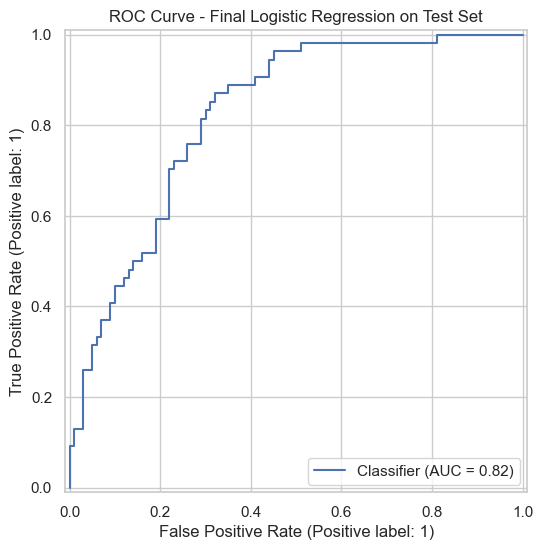

In [41]:
# ارزیابی نهایی روی x_test
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, RocCurveDisplay

# پیش‌بینی روی داده تست
y_pred_test = best_logistic_final.predict(X_test)
y_proba_test = best_logistic_final.predict_proba(X_test)[:, 1]

# متریک‌ها
print("Final Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

# رسم منحنی ROC
RocCurveDisplay.from_predictions(y_test, y_proba_test)
plt.title("ROC Curve - Final Logistic Regression on Test Set")
plt.grid(True)
plt.show()


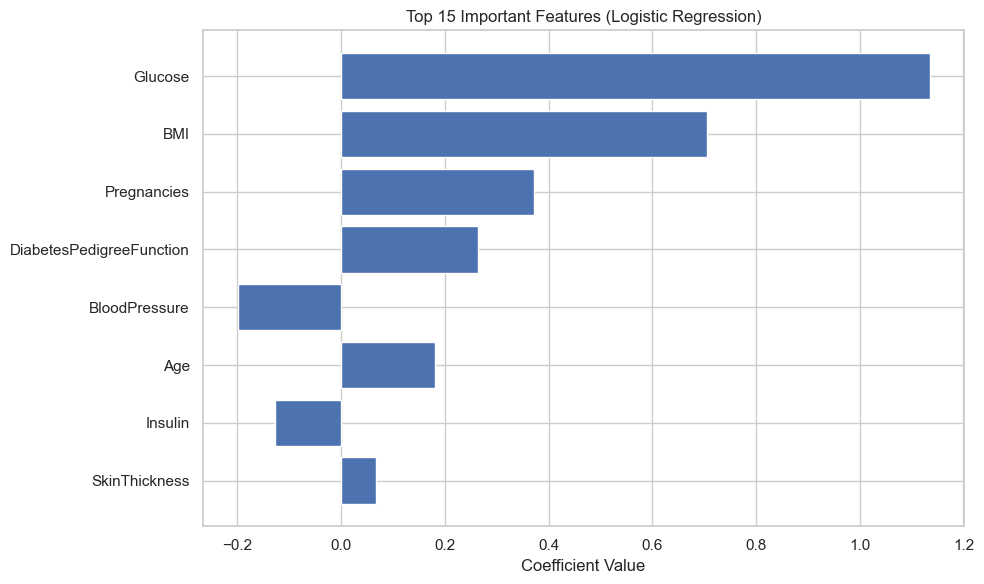

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# فرض بر اینکه X هنوز DataFrame است
feature_names = X.columns  # یا full_data.drop("Outcome", axis=1).columns

coefficients = best_logistic.coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'AbsCoefficient': np.abs(coefficients)
}).sort_values(by='AbsCoefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'][:15][::-1], coef_df['Coefficient'][:15][::-1])
plt.xlabel("Coefficient Value")
plt.title("Top 15 Important Features (Logistic Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


خب با انجام دادن این مراحل میبینیم که در نهایت به مدلی که دقت بالایی داشته باشه نرسیدیم 
در مرحله بعد میخوام ویژگی های جدیدی بسازم و کلاس هارو با ساخت داده جدید با هم برابر کنم 
اول داده جدید تولید میکنیم با روش سموت که کلاس هامون برابر بشن 

In [43]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# جدا کردن ویژگی‌ها و برچسب‌ها
X = full_data.drop('Outcome', axis=1)
y = full_data['Outcome']

print("قبل از SMOTE:", Counter(y))

# اعمال SMOTE با k_neighbors=3
smote = SMOTE(k_neighbors=3, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("بعد از SMOTE:", Counter(y_res))

# تبدیل داده‌ی بازنمونه‌گیری‌شده به DataFrame
resampled_data = X_res.copy()
resampled_data['Outcome'] = y_res


قبل از SMOTE: Counter({0: 500, 1: 268})
بعد از SMOTE: Counter({1: 500, 0: 500})


خب واضحه که کلاس ها با هم برابر شدن و ما این کارو با 
smote 
انجام دادیم 

In [44]:
import pandas as pd

df = resampled_data.copy()  # استفاده از داده‌های متعادل‌شده

# دسته‌بندی سنی
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 45, 100], labels=['Young', 'Middle', 'Old'])

# ویژگی‌های ترکیبی
df['BMI_Age'] = df['BMI'] * df['Age']
df['Glucose_BMI'] = df['Glucose'] / (df['BMI'] + 1e-5)  # جلوگیری از تقسیم بر صفر
df['Insulin_to_Glucose'] = df['Insulin'] / (df['Glucose'] + 1e-5)
df['Is_Obese'] = (df['BMI'] > 30).astype(int)
df['Has_High_Glucose'] = (df['Glucose'] > 140).astype(int)
df['Has_Low_BP'] = (df['BloodPressure'] < 70).astype(int)
df['Pregnancy_Rate'] = df['Pregnancies'] / (df['Age'] + 1e-5)
df['Is_Young_And_Obese'] = ((df['Age'] < 30) & (df['BMI'] > 30)).astype(int)
df['DPF_Age'] = df['DiabetesPedigreeFunction'] * df['Age']


In [45]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0              6      148             72             35        0  33.600000   
1              1       85             66             29        0  26.600000   
2              8      183             64              0        0  23.300000   
3              1       89             66             23       94  28.100000   
4              0      137             40             35      168  43.100000   
..           ...      ...            ...            ...      ...        ...   
995            1      118             87             37      113  39.935715   
996            4      164             72              0        0  38.663446   
997           10      104             85             38        0  46.013133   
998            4      149             74             29      126  32.926160   
999            4      184             74             39      285  37.222870   

     DiabetesPedigreeFunction  Age  Outcome AgeGroup      BMI_Age  \
0                    0.627000   50        1      Old  1680.000000   
1                    0.351000   31        0   Middle   824.600000   
2                    0.672000   32        1   Middle   745.600000   
3                    0.167000   21        0    Young   590.100000   
4                    2.288000   33        1   Middle  1422.300000   
..                        ...  ...      ...      ...          ...   
995                  0.701976   31        1   Middle  1238.007166   
996                  0.991460   33        1   Middle  1275.893711   
997                  1.063357   40        1   Middle  1840.525314   
998                  0.559809   49        1      Old  1613.381837   
999                  0.260816   34        1   Middle  1265.577595   

     Glucose_BMI  Insulin_to_Glucose  Is_Obese  Has_High_Glucose  Has_Low_BP  \
0       4.404761            0.000000         1                 1           0   
1       3.195488            0.000000         0                 0           1   
2       7.854074            0.000000         0                 1           1   
3       3.167259            1.056180         0                 0           1   
4       3.178654            1.226277         1                 0           1   
..           ...                 ...       ...               ...         ...   
995     2.954748            0.957627         1                 0           0   
996     4.241732            0.000000         1                 1           0   
997     2.260224            0.000000         1                 0           0   
998     4.525276            0.845638         1                 1           0   
999     4.943196            1.548913         1                 1           0   

     Pregnancy_Rate  Is_Young_And_Obese    DPF_Age  
0          0.120000                   0  31.350000  
1          0.032258                   0  10.881000  
2          0.250000                   0  21.504000  
3          0.047619                   0   3.507000  
4          0.000000                   0  75.504000  
..              ...                 ...        ...  
995        0.032258                   0  21.761259  
996        0.121212                   0  32.718192  
997        0.250000                   0  42.534299  
998        0.081633                   0  27.430639  
999        0.117647                   0   8.867749  

[1000 rows x 19 columns]

# چه ویژگی هایی ساختم ؟

# ۱. ترکیب ویژگی‌ها برای یافتن نسبت‌ها
هدف از ساخت نسبت‌ها، نرمال‌سازی مقادیر خام و استخراج بینش‌های مفید‌تره:

Glucose_per_Age = Glucose / Age
→ سطح قند خون نسبت به سن. مثلاً گلوکز بالا در سن پایین می‌تونه نشونه مهم‌تری باشه تا در سن بالا.

BMI_per_Age = BMI / Age
→ وزن بدن نسبت به سن. چاقی در سن پایین می‌تونه ریسک دیابت را بیشتر نشون بده.

Insulin_per_Glucose = Insulin / Glucose
→ نشون می‌ده انسولین چقدر نسبت به قند خون ترشح شده؛ می‌تونه الگوی مقاومت به انسولین باشه.

# ۲. تعریف ویژگی‌های باینری (گسسته)
برای تبدیل مقادیر پیوسته به وضعیت‌های مهم سلامت:

High_Glucose = ۱ اگر Glucose > 125، وگرنه ۰
→ مرز دیابت طبق راهنمای پزشکی.

High_BMI = ۱ اگر BMI > 30
→ چاقی بالینی.

High_BloodPressure = ۱ اگر BloodPressure > 80
→ فشار خون بالا.

Is_Young = ۱ اگر سن کمتر از 30 سال
→ برای تحلیل اینکه آیا دیابت در سن پایین رخ داده.

# ۳. ویژگی‌های تعاملی
ساخت ویژگی‌هایی که تأثیر دو متغیر را همزمان بررسی می‌کنند:

Pregnancies_Age_Ratio = Pregnancies / (Age + 1)
→ میزان بارداری نسبت به سن. عدد بزرگ‌ می‌تونه به ریسک‌پذیری بیشتر اشاره کنه.

BMI_x_Glucose = BMI * Glucose
→ ترکیب وزن و قند خون که ممکنه باهم اثر مضاعف داشته باشن.


    به سطح نرمال، پیش‌دیابت، دیابت

In [14]:
!pip install lazypredict

lazypredict 
برای اجرای خودکار چند مدل و مقایسه عملکرد آن‌ها

In [46]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# تبدیل ستون AgeGroup به ویژگی‌های عددی (one-hot)
df_encoded = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True)

# 2. جدا کردن ویژگی‌ها و برچسب هدف
X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']
# نرمال‌سازی
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تقسیم داده‌ها
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# اجرای مدل‌های مختلف با LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# نمایش نتایج
import pandas as pd
pd.set_option('display.max_rows', None)  # نمایش همه مدل‌ها
display(models)


  0%|          | 0/31 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2069
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.82               0.82     0.83      0.82   
ExtraTreesClassifier               0.82               0.82     0.82      0.82   
XGBClassifier                      0.81               0.81     0.82      0.81   
RandomForestClassifier             0.81               0.81     0.82      0.81   
RidgeClassifierCV                  0.80               0.80     0.80      0.79   
BaggingClassifier                  0.79               0.79     0.79      0.79   
SVC                                0.79               0.79     0.79      0.78   
RidgeClassifier                    0.79               0.79     0.79      0.78   
Perceptron                         0.79               0.79     0.79      0.78   
LinearDiscriminantAnalysis         0.79               0.79     0.79      0.78   
LabelPropagation                   0.79               0.78     0.78      0.78   
LabelSpreading                     0.79               0.78     0.78      0.78   
LogisticRegression                 0.78               0.78     0.78      0.78   
LinearSVC                          0.78               0.78     0.78      0.78   
CalibratedClassifierCV             0.78               0.78     0.78      0.78   
NuSVC                              0.78               0.78     0.78      0.77   
AdaBoostClassifier                 0.78               0.78     0.78      0.77   
BernoulliNB                        0.77               0.77     0.77      0.77   
NearestCentroid                    0.76               0.76     0.76      0.76   
DecisionTreeClassifier             0.76               0.76     0.76      0.75   
SGDClassifier                      0.74               0.75     0.75      0.74   
PassiveAggressiveClassifier        0.73               0.73     0.73      0.73   
KNeighborsClassifier               0.73               0.73     0.73      0.73   
ExtraTreeClassifier                0.72               0.72     0.72      0.72   
QuadraticDiscriminantAnalysis      0.56               0.56     0.56      0.45   
GaussianNB                         0.51               0.51     0.51      0.36   
DummyClassifier                    0.50               0.50     0.50      0.33   

                               Time Taken  
Model                                      
LGBMClassifier                       0.15  
ExtraTreesClassifier                 0.18  
XGBClassifier                        0.14  
RandomForestClassifier               0.38  
RidgeClassifierCV                    0.02  
BaggingClassifier                    0.08  
SVC                                  0.06  
RidgeClassifier                      0.02  
Perceptron                           0.02  
LinearDiscriminantAnalysis           0.03  
LabelPropagation                     0.06  
LabelSpreading                       0.07  
LogisticRegression                   0.03  
LinearSVC                            0.02  
CalibratedClassifierCV               0.04  
NuSVC                                0.08  
AdaBoostClassifier                   0.17  
BernoulliNB                          0.02  
NearestCentroid                      0.02  
DecisionTreeClassifier               0.02  
SGDClassifier                        0.02  
PassiveAggressiveClassifier          0.02  
KNeighborsClassifier                 0.11  
ExtraTreeClassifier                  0.01  
QuadraticDiscriminantAnalysis        0.02  
GaussianNB                           0.02  
DummyClassifier                      0.01

خب داریم میبینیم مدل ها عملکرد بهتری دارن حتی با این هایپرپارامتر ها را دست کاری نرکدیم 
مدل لاجستیک عملکرد بهتری از قبل دارد ولی با مدل جدیدی مواجه هستیم که بهتر از هر مدل دیگه ای تا الان کار کرده
LGBMClassifier 	
در ادامه بهترین مدل لاجستیک را پیدا میکنیم و با بهترین مدل لاجستیک قبلی که با داده خام اموزش دیده بود میسنجیم 
و بعد مدل 
LGBMClassifier 	
را اماده میکنیم که ببینیم بهترین مدل کدام هستن 

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score

# تعریف مدل اولیه
logreg = LogisticRegression(random_state=42, max_iter=1000)

# پارامترهایی که می‌خواهیم جستجو کنیم
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # ضریب تنظیم (Regularization strength)
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # نوع جریمه (برای elasticnet نیاز به solver خاص است)
    'solver': ['saga']  # 'saga' از جمله solvers پشتیبانی‌کننده elasticnet است
}

# ایجاد GridSearch با 5-fold cross-validation و معیار F1
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid,
                           cv=5, scoring='f1', verbose=1, n_jobs=-1)

# آموزش مدل
grid_search.fit(X_train, y_train)

# بهترین پارامترها
print("Best parameters found: ", grid_search.best_params_)

# بهترین مدل
best_model = grid_search.best_estimator_

# پیش‌بینی روی داده تست
y_pred = best_model.predict(X_test)

# ارزیابی مدل
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.7800
F1 Score: 0.7800
ROC AUC: 0.7800

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       100
           1       0.78      0.78      0.78       100

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



خب به وضوح میشه تاثیر تولید داده(اسموت) برای کلاس کم تر را در تغییر اف وان اسکور که متریک کیلیدی در این نوع مسایل که کلاس ها برابر نیست دید
از ۵۶ به ۷۸ و همینطور متریک اکورسی از ۷۱ به ۷۸ ارتقا پیدا کرده . اما قطعا این مدل هم بهترین مدل نیست در ادامه بهترین مدل را میسازیم 

In [48]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# تعریف مدل اولیه
lgbm = LGBMClassifier(random_state=42)

# تعریف پارامترهایی که می‌خواهیم جستجو کنیم
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500]
}

# تعریف GridSearch با 5-fold cross-validation
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, 
                           cv=5, scoring='f1', verbose=1, n_jobs=-1)

# اجرا و آموزش مدل
grid_search.fit(X_train, y_train)

# بهترین پارامترها
print("Best parameters found: ", grid_search.best_params_)

# بهترین مدل
best_model_lgbm = grid_search.best_estimator_

# ارزیابی روی داده تست
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2069
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

خب این مدل بهترین عملکرد را داشته است . خیلی دوست دارم ببینم مهندسیه ویژگی ها چه تاثیری روی مدل داشته است . 
پس با فیچر انپورتنس تاثیر ویژگی ها در خروجی مدل را میبینیم 

       Feature  Importance
5    Feature 5         374
16  Feature 16         361
1    Feature 1         335
8    Feature 8         333
9    Feature 9         306
14  Feature 14         305
6    Feature 6         285
2    Feature 2         258
7    Feature 7         211
3    Feature 3         171
4    Feature 4         123
10  Feature 10          90
0    Feature 0          79
17  Feature 17          22
15  Feature 15           4
13  Feature 13           2
11  Feature 11           2
12  Feature 12           0
18  Feature 18           0


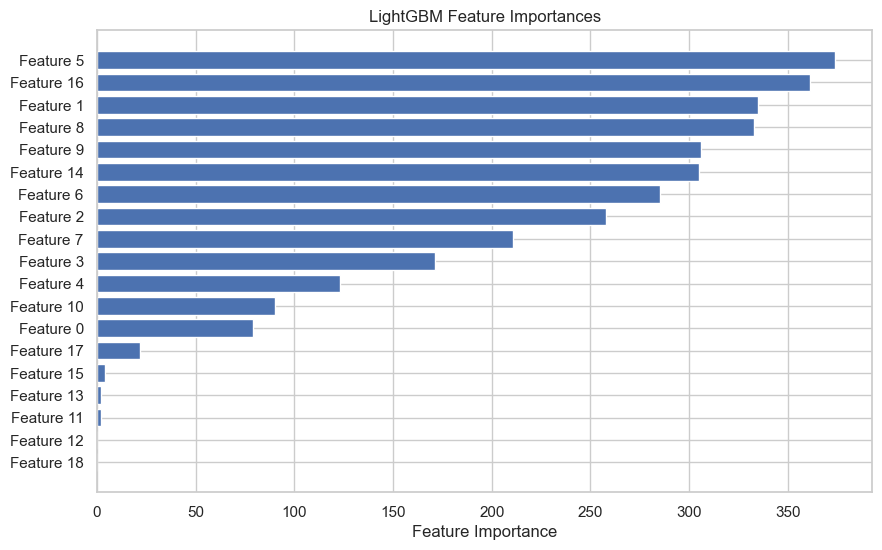

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# گرفتن اهمیت ویژگی‌ها
feature_importances = best_model_lgbm.feature_importances_

# اسامی ویژگی‌ها (اگر X_train یک DataFrame هست)
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# ساخت DataFrame برای مرتب‌سازی و نمایش
fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# مرتب‌سازی بر اساس اهمیت
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# نمایش در قالب جدول
print(fi_df)

# رسم نمودار میله‌ای اهمیت‌ها
plt.figure(figsize=(10,6))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.gca().invert_yaxis()  # نمایش بیشترین اهمیت بالا
plt.xlabel('Feature Importance')
plt.title('LightGBM Feature Importances')
plt.show()


In [52]:
fi_df

Feature  Importance
5    Feature 5         374
16  Feature 16         361
1    Feature 1         335
8    Feature 8         333
9    Feature 9         306
14  Feature 14         305
6    Feature 6         285
2    Feature 2         258
7    Feature 7         211
3    Feature 3         171
4    Feature 4         123
10  Feature 10          90
0    Feature 0          79
17  Feature 17          22
15  Feature 15           4
13  Feature 13           2
11  Feature 11           2
12  Feature 12           0
18  Feature 18           0

به نظر چند ویژگی به صورت کلی تاثیری روی خروجی مدل ندارند 

بهتریه اونارو حذف کنیم و در نظر دارم کراس ولیدیشن بیشتر کنم تا ارزیابی بیشتری داشته باشم 

کراس ولیدیشن و به ۲۰ تا ارتقا میدم . فکر نمیکنم  بتونم بخاطر کم بودن داده که هزار نمونه است بیشتر از ۲۰ بزارم
البته شدن میشه ولی به سیستم من هم ربط داره :)

حذف فیچرهایی با اهمیت کمتر از 10

In [54]:
# فرض: feature_importances از مدل گرفته شده و X همون df اصلی بدون ستون Outcome هست
feature_importances = best_model_lgbm.feature_importances_
X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']

# استفاده از نام واقعی ستون‌ها
feature_names = X.columns.tolist()

# ساخت DataFrame با نام ستون‌های واقعی
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# مرتب‌سازی
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# حذف فیچرهای با اهمیت کم
low_importance_features = fi_df[fi_df['Importance'] < 10]['Feature'].tolist()

# حذف این ستون‌ها از دیتافریم
X_filtered = X.drop(columns=low_importance_features)

# ادامه: نرمال‌سازی و تقسیم‌بندی مجدد
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_filtered = scaler.fit_transform(X_filtered)

from sklearn.model_selection import train_test_split
X_train_filt, X_test_filt, y_train_filt, y_test_filt = train_test_split(
    X_scaled_filtered, y, test_size=0.2, random_state=42, stratify=y
)

print(f"فیچرهای حذف‌شده: {low_importance_features}")
print(f"تعداد ویژگی‌های باقی‌مانده: {X_filtered.shape[1]}")


فیچرهای حذف‌شده: ['Is_Young_And_Obese', 'Has_Low_BP', 'Is_Obese', 'Has_High_Glucose', 'AgeGroup_Old']
تعداد ویژگی‌های باقی‌مانده: 14


In [57]:
X_filtered

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0 33.60   
1              1       85             66             29        0 26.60   
2              8      183             64              0        0 23.30   
3              1       89             66             23       94 28.10   
4              0      137             40             35      168 43.10   
5              5      116             74              0        0 25.60   
6              3       78             50             32       88 31.00   
7             10      115              0              0        0 35.30   
8              2      197             70             45      543 30.50   
9              8      125             96              0        0  0.00   
10             4      110             92              0        0 37.60   
11            10      168             74              0        0 38.00   
12            10      139             80              0        0 27.10   
13             1      189             60             23      846 30.10   
14             5      166             72             19      175 25.80   
15             7      100              0              0        0 30.00   
16             0      118             84             47      230 45.80   
17             7      107             74              0        0 29.60   
18             1      103             30             38       83 43.30   
19             1      115             70             30       96 34.60   
20             3      126             88             41      235 39.30   
21             8       99             84              0        0 35.40   
22             7      196             90              0        0 39.80   
23             9      119             80             35        0 29.00   
24            11      143             94             33      146 36.60   
25            10      125             70             26      115 31.10   
26             7      147             76              0        0 39.40   
27             1       97             66             15      140 23.20   
28            13      145             82             19      110 22.20   
29             5      117             92              0        0 34.10   
30             5      109             75             26        0 36.00   
31             3      158             76             36      245 31.60   
32             3       88             58             11       54 24.80   
33             6       92             92              0        0 19.90   
34            10      122             78             31        0 27.60   
35             4      103             60             33      192 24.00   
36            11      138             76              0        0 33.20   
37             9      102             76             37        0 32.90   
38             2       90             68             42        0 38.20   
39             4      111             72             47      207 37.10   
40             3      180             64             25       70 34.00   
41             7      133             84              0        0 40.20   
42             7      106             92             18        0 22.70   
43             9      171            110             24      240 45.40   
44             7      159             64              0        0 27.40   
45             0      180             66             39        0 42.00   
46             1      146             56              0        0 29.70   
47             2       71             70             27        0 28.00   
48             7      103             66             32        0 39.10   
49             7      105              0              0        0  0.00   
50             1      103             80             11       82 19.40   
51             1      101             50             15       36 24.20   
52             5       88             66             21       23 24.40   
53       

In [33]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score

# تعریف مدل
lgbm = LGBMClassifier(random_state=42)

# تعریف پارامترها
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500]
}

# اجرای GridSearch با 5-fold cross-validation
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, 
                           cv=20, scoring='f1', verbose=1, n_jobs=-1)

grid_search.fit(X_train_filt, y_train_filt)

# بهترین مدل
best_model_lgbm_filtered = grid_search.best_estimator_

# پیش‌بینی
y_pred = best_model_lgbm_filtered.predict(X_test_filt)

# گزارش
print("Best parameters found:", grid_search.best_params_)
print(f"Accuracy: {accuracy_score(y_test_filt, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test_filt, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_filt, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test_filt, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2054
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

Accuracy: 0.8100
F1 Score: 0.8190
ROC AUC: 0.8100
متریک ها عمل کرد بهتر مدل را به ما نمایش میدهند

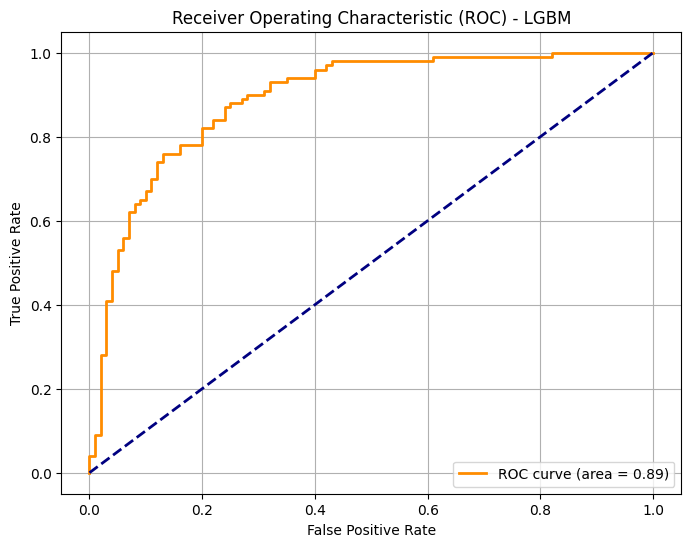

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# محاسبه احتمال کلاس مثبت (برای رسم ROC)
y_proba = best_model_lgbm_filtered.predict_proba(X_test_filt)[:, 1]

# محاسبه مقادیر FPR، TPR برای منحنی ROC
fpr, tpr, thresholds = roc_curve(y_test_filt, y_proba)
roc_auc = auc(fpr, tpr)

# رسم منحنی ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # خط تصادفی
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - LGBM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [35]:
import pickle

# ذخیره مدل آموزش‌دیده
with open("model_lgbm_diabetes.pkl", "wb") as f:
    pickle.dump(best_model_lgbm_filtered, f)
